In [1]:
import numpy as np
import pandas as pd
import datatable as dt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# Introduction

In this homework, Gesture Recognition Data was used to satisfy the required tasks from the Homework Description. This Notebook includes 2 main parts. The first one is related to display of given data on 3D axis. In this manner, acceleration data was converted to speed and then to location. This 2-step conversion decision was taken after asking the Professor Baydoğan (Only speed is mentioned in the Homework Description). So, location will also be used for second part of the Notebook. 

In the second part of the Notebook, 2 different representation types will be tried in order to represent the Gestures. However, these representation types will be controlled in different manners. First of all, how techniques perform **will be controlled in each axis individually.** By doing that, possible problems will be understoood and a comparision will be hold in **axis manner.** Piecewise Aggregate Approximation is the first technique to control this performance measure, and the second one is Adaptive Piecewise Constant Approximation with Linear Regressor Tree. The performance of the these techniques will be controlled visually(as mentined in Homework Description) in each Gesture and in each axis. Only one example will be plotted in order to reduce the lenght of the Notebook.

In addition to representation in axis base, gesture recognition must be controlled on all axis to classify them. In this perspective, hard voting technique by using SAX representation will be used to get 1 dimensional result firstly. For second Technique, PCA(Principal Component Analysis) will be tried to reduce 3 dimension to 1 dimension. Linear Regressor Tree for Adaptive Piecewise Constant Approximation will be tried in this reduced dimension. At the end, both techniques can be controlled **visually in one dimension.** 

# Context
(In order to get specified techniques rapidly, a context part is added to Notebook.)

1. [Data Preparation](#1)
1. [Part 1: Display of Gestures](#2)
1. [Part 2: Piecewise Aggregate Approximation](#3)
1. [Part 2: Adaptive Piecewise Representation with Linear Regressor Tree](#4)
1. [Part 2: Gesture Recognation Perspective](#5)
1. [Last Comment and Conclusion](#6)

<a id="1"></a>
# Data Preparation

In [2]:
os.getcwd()

'C:\\Users\\bahad\\GitHub\\IE48B\\Homework1'

In [3]:
Folder_path="UWave-20211030T180805Z-001/UWave/"

In [4]:
x_train, y_train, z_train =pd.read_csv(f"{Folder_path}uWaveGestureLibrary_X_TRAIN.csv"),\
                           pd.read_csv(f"{Folder_path}uWaveGestureLibrary_Y_TRAIN.csv"),\
                           pd.read_csv(f"{Folder_path}uWaveGestureLibrary_Z_TRAIN.csv")

In [5]:
class_indicator=pd.DataFrame(x_train.iloc[:, 0])

In [6]:
acc_x=x_train.iloc[:,1:].T.cumsum().T.add_suffix("_X")
acc_y=y_train.iloc[:,1:].T.cumsum().T.add_suffix("_Y")
acc_z=z_train.iloc[:,1:].T.cumsum().T.add_suffix("_Z")

In [7]:
dataframes=[class_indicator, acc_x, acc_y, acc_z]

In [8]:
all_acc=pd.concat(dataframes, axis=1)

## Gesture Filter

In [9]:
def filter_data(ind_data, x_data, y_data, z_data, index):

    x_concat=pd.concat([ind_data,x_data], axis=1)
    x_filtered=x_concat[x_concat.iloc[:, 0]== index].iloc[:, 1:]
    
    y_concat=pd.concat([ind_data,y_data], axis=1)
    y_filtered=y_concat[y_concat.iloc[:, 0]== index].iloc[:, 1:]
    
    z_concat=pd.concat([ind_data,z_data], axis=1)
    z_filtered=z_concat[z_concat.iloc[:, 0]== index].iloc[:, 1:]
    
    return x_filtered, y_filtered, z_filtered

<a id="2"></a>
# Part 1: Display

In [10]:
import plotly.express as px

As mentioned before, Gestures will be drawn with location information. For each Gesture, 1 example plot will be added. In addition, Gestures will be plotted by using created print_graph() function.

## Graph Display Function

In [11]:
def print_graph(x ,y, z, no):
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax = Axes3D(fig)

    ax.scatter(x, y, z,)
    ax.set_title(f"Geture {no} Example")
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")
    
    return plt.show()

## Gesture 1

In [12]:
x_1, y_1, z_1 = filter_data(class_indicator, acc_x, acc_y, acc_z, 1)

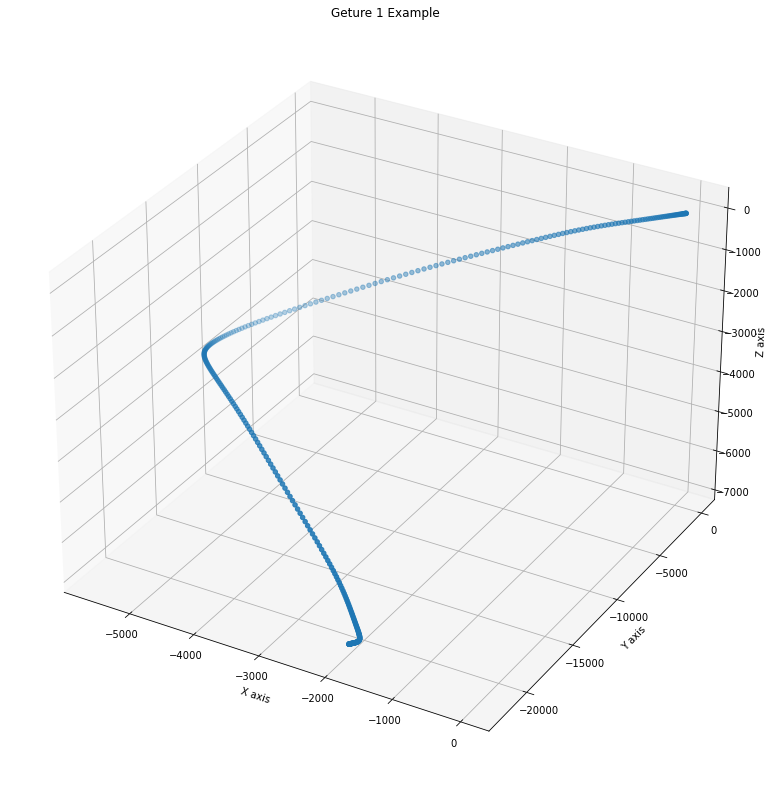

In [13]:
print_graph(x_1.T.cumsum().iloc[:, 0], y_1.T.cumsum().iloc[:, 0], z_1.T.cumsum().iloc[:, 0], 1)

## Plotly Plot

In order to analyze which value (velocity or position) was analyzed by looking with an interactive plot.

In [14]:
# fig1=px.scatter_3d(x=x_1.T.cumsum().iloc[:, 0], y=y_1.T.cumsum().iloc[:, 0], z=z_1.T.cumsum().iloc[:, 0],
#              labels=dict(x="X Axis", y="Y Axis", z="Z Axis"), title="Gesture 1 Example")
# fig1.update_traces(marker=dict(size=4,opacity=0.4))

## Gesture 2

In [15]:
x_2, y_2, z_2 = filter_data(class_indicator, acc_x, acc_y, acc_z, 2)

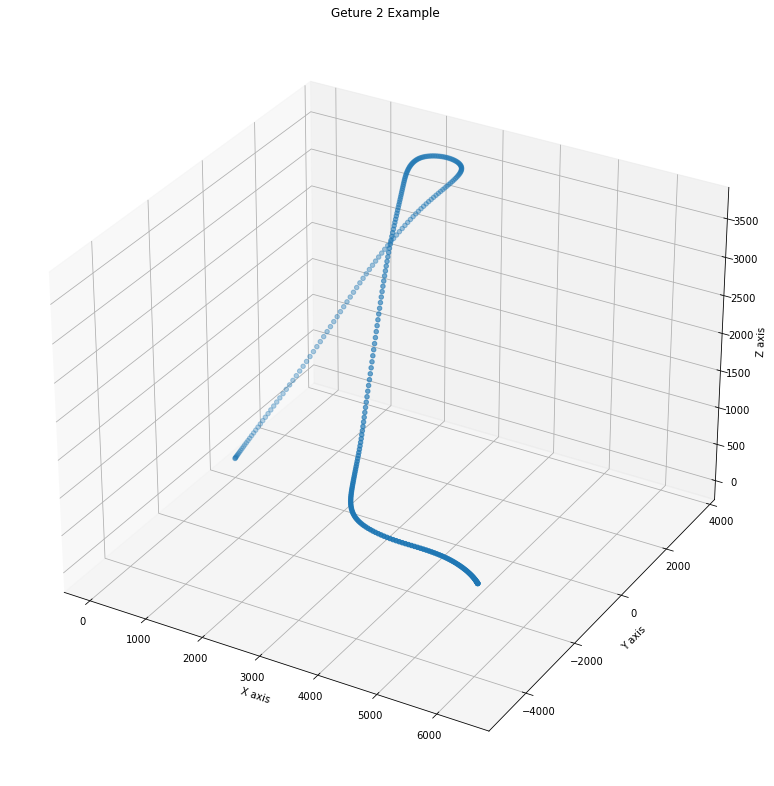

In [16]:
print_graph(x_2.T.cumsum().iloc[:, 0], y_2.T.cumsum().iloc[:, 0], z_2.T.cumsum().iloc[:, 0], 2)

## Gesture 3

In [17]:
x_3, y_3, z_3 = filter_data(class_indicator, acc_x, acc_y, acc_z, 3)

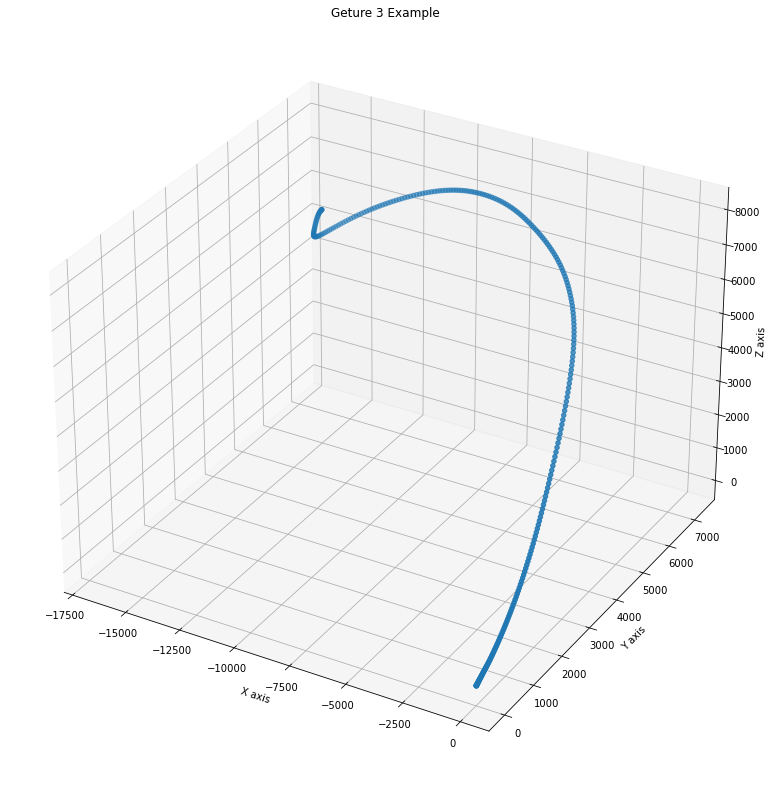

In [18]:
print_graph(x_3.T.cumsum().iloc[:, 0], y_3.T.cumsum().iloc[:, 0], z_3.T.cumsum().iloc[:, 0], 3)

## Gesture 4

In [19]:
x_4, y_4, z_4 = filter_data(class_indicator, acc_x, acc_y, acc_z, 4)

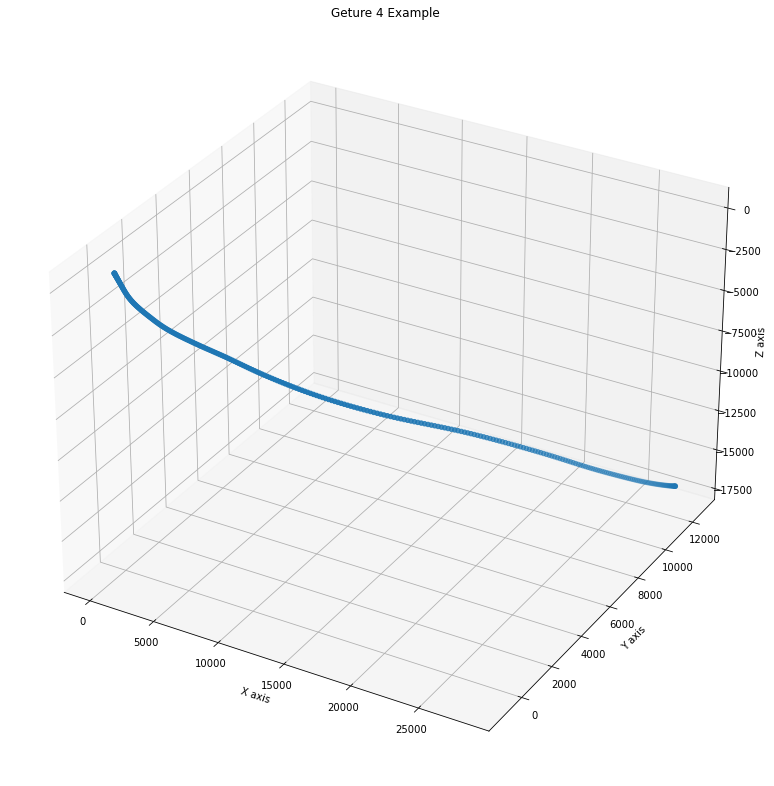

In [20]:
print_graph(x_4.T.cumsum().iloc[:, 0], y_4.T.cumsum().iloc[:, 0], z_4.T.cumsum().iloc[:, 0], 4)

## Gesture 5

In [21]:
x_5, y_5, z_5 = filter_data(class_indicator, acc_x, acc_y, acc_z, 5)

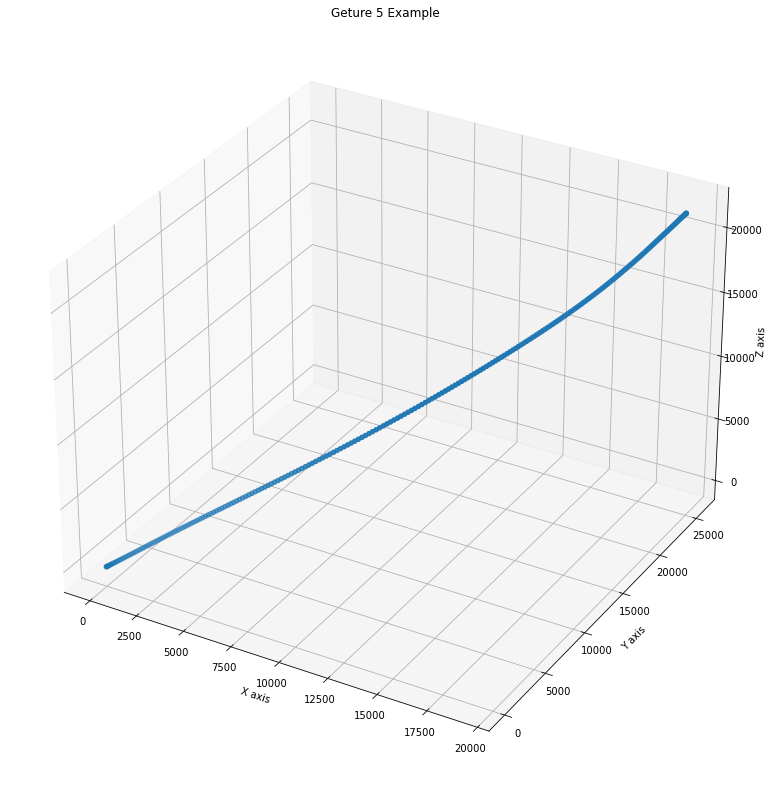

In [22]:
print_graph(x_5.T.cumsum().iloc[:, 0], y_5.T.cumsum().iloc[:, 0], z_5.T.cumsum().iloc[:, 0], 5)

## Gesture 6

In [23]:
x_6, y_6, z_6 = filter_data(class_indicator, acc_x, acc_y, acc_z, 6)

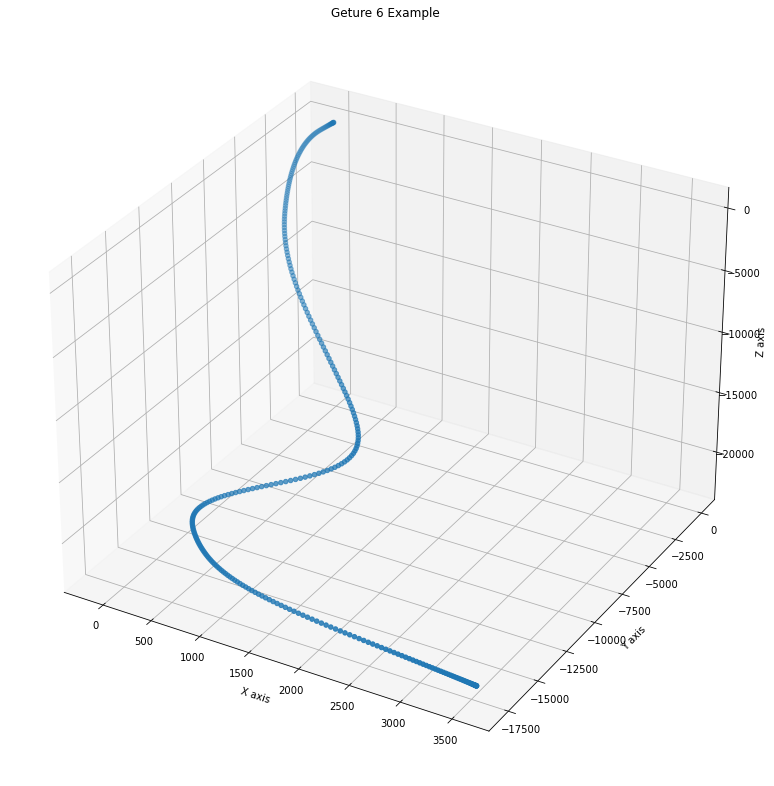

In [24]:
print_graph(x_6.T.cumsum().iloc[:, 0], y_6.T.cumsum().iloc[:, 0], z_6.T.cumsum().iloc[:, 0], 6)

## Gesture 7

In [25]:
x_7, y_7, z_7 = filter_data(class_indicator, acc_x, acc_y, acc_z, 7)

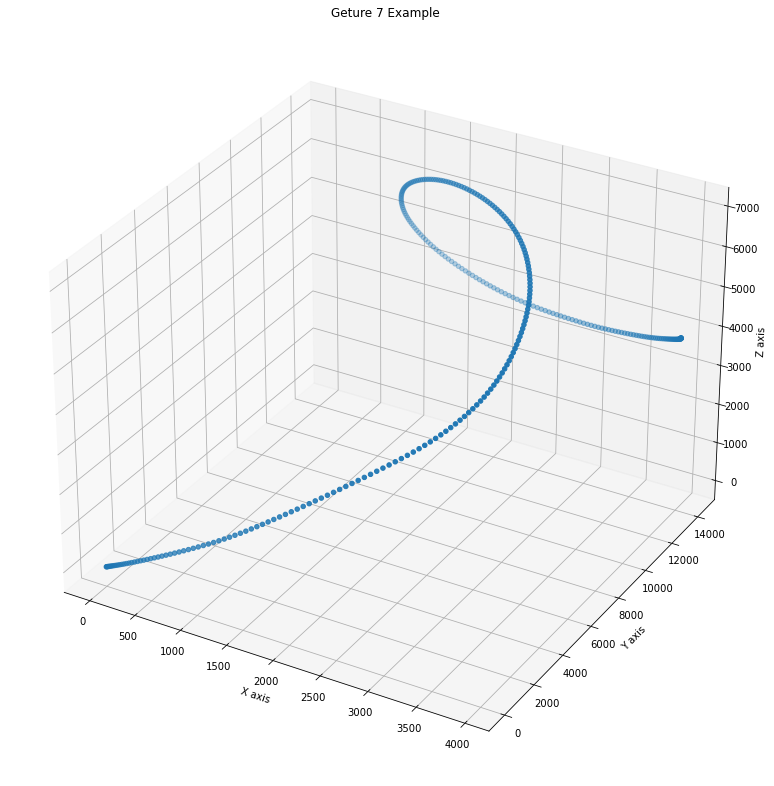

In [26]:
print_graph(x_7.T.cumsum().iloc[:, 0], y_7.T.cumsum().iloc[:, 0], z_7.T.cumsum().iloc[:, 0], 7)

## Gesture 8

In [27]:
x_8, y_8, z_8 = filter_data(class_indicator, acc_x, acc_y, acc_z, 8)

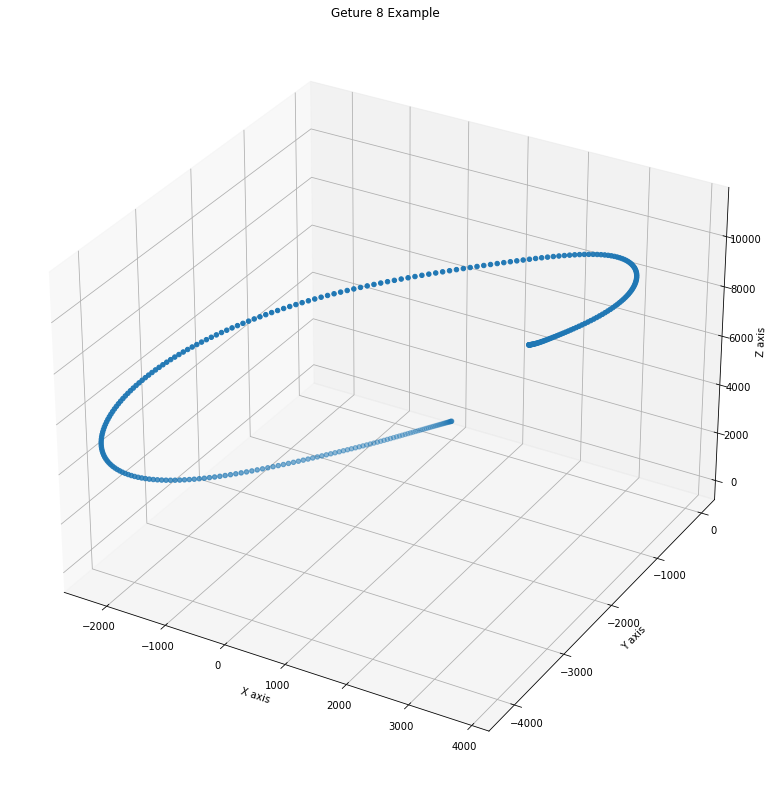

In [28]:
print_graph(x_8.T.cumsum().iloc[:, 0], y_8.T.cumsum().iloc[:, 0], z_8.T.cumsum().iloc[:, 0], 8)

# Part 2: 2 Representation Method

First of all, PAA will be tried in the beginning of part 2. In addition, SAX will be used after applying znorm, in order to have string representation. String data will be obtained in Piecewise Aggregate Approximation techniques because both of them have similar processes. In order to reduce lenght of Notebook, this approach will be used. In addition, majority function exists in the beggining of this part. This function decision final string by considering the axis's strings. How to work this function can be understood by looking the explanation of function.

In [29]:
from saxpy.znorm import znorm
from saxpy.sax import ts_to_string
from saxpy.paa import paa
from saxpy.alphabet import cuts_for_asize

<a id="3"></a>
# Piecewise Aggregate Approximation Function

There is 315 different time point in each axis, so it is hard to observe and analyze it by using Symbolic Aggregate approXimation(SAX) without Piecewise Aggregate Approximation(PAA). In this manner, SAX will be used with PAA in order to understand the symbols more easily. In addition, each axis will be constructed separately. Each axis will be inspected separately, and final comment will be at the end of the all plots.

3 different functions are created for this part, string_with_paa(), majority_voting(), and visualization(). Both of them reduces the lenght of the Notebook. In addition, understandable variable names and some notes will be added these functions to make it easily controllable.

In [30]:
def string_with_paa(dataset):
    length = dataset.shape[0]
    shape_information=[]
    value_information=[]
    
    for i in range(length):
        current_values=np.array(dataset.iloc[i, :])
        dat_znorm = znorm(current_values) # Normalized Data to easily control understand how to symbols are selected
        dat_paa = paa(current_values, 9) # Similar to dimension Reduction, Piecewise Aggregate Approximation (PAA) is used to get
                                     # a visiable result
        dat_zpaa= paa(dat_znorm, 9)
        value_information.append(list(dat_paa))
    
        strings=ts_to_string(dat_zpaa, cuts_for_asize(8))
        shape_information.append(list(strings))
            
    return shape_information, value_information

## Majority Voting

 there is at least 2 the same string for a specific period, this string is decided as final letter(3 to 1 Dimension Reduction). In addition, If there is 3 different letters for specific period, these letters converted to numbers and soft voting will be used to get a number. At the end of this situation, this number will be converted to a string by considering initial determined values. 

In [31]:
def majority_voting(dt):
    final_vote=[]
    for i in range(dt.shape[0]):
        if(dt.iloc[i,0]==dt.iloc[i,1]):
            final_vote.append(dt.iloc[i,0])
            
        elif(dt.iloc[i,0]==dt.iloc[i,2]):
            final_vote.append(dt.iloc[i,0])
            
        elif(dt.iloc[i,1]==dt.iloc[i,2]):
            final_vote.append(dt.iloc[i,1])
        
        else:
            mean_vote=round(((ord(dt.iloc[i,0])-96)+(ord(dt.iloc[i,1])-96)+(ord(dt.iloc[i,2])-96))/3)
            final_vote.append(chr(mean_vote+96))
    return final_vote

## Gesture 1 SAX with PAA

In [32]:
x_string_1, x_values_1=string_with_paa(x_1)
y_string_1, y_values_1=string_with_paa(y_1)
z_string_1, z_values_1=string_with_paa(z_1)

In [33]:
string_data_1 = [pd.DataFrame({"X":x_string_1[i], "Y":y_string_1[i], "Z":z_string_1[i]}) for i in range(x_1.shape[0])]

In [34]:
value_data_1 = [pd.DataFrame({"X":x_values_1[i], "Y":y_values_1[i], "Z":z_values_1[i]}) for i in range(x_1.shape[0])]

### Hard Voting 

In [35]:
for i in range(x_1.shape[0]):
    string_data_1[i]["hard_voting"]=majority_voting(string_data_1[i])

## Visual Control Gesture 1

One example implementation for new lines will be demonstrated at below. Remaning will be added to visualitation function in order to reduce repated codes for other Gestures.

In [36]:
def visualization(origin, created, gesture_no, ax_code, id_value):
    """ 
    x value is represented by 0
    y value is represented by 1
    z value is represented by 2
    id_value represent which item is selected(in sequence) in filtered dataset by gesture class information(V1 in intial data)
    """
    key_values = {"X": 0, "Y": 1, "Z":2}
    
    ax_sequence=key_values.get(ax_code)
    
    location=pd.DataFrame(origin.iloc[id_value, :]).reset_index(drop=True) #
    location.set_axis(["original_values"], axis=1, inplace=True)
    location.index+=1

    obtanied_locations=pd.DataFrame(created[id_value].iloc[:, ax_sequence])
    obtanied_locations.set_axis(["PAA_value"], axis=1, inplace=True)
    obtanied_locations.index+=1
    obtanied_locations.index*=35

    mergedDf = pd.merge(location, obtanied_locations, how="left", left_index=True, right_index=True)
    mergedDf.PAA_value.fillna(method="bfill", inplace=True)
    
    plt.figure(figsize=(14, 8)) 
    plt.plot(mergedDf["original_values"], label="True Values")
    plt.plot(mergedDf["PAA_value"], label="PAA Values")
    plt.title(f"{ax_code} axis of {gesture_no}. Gesture with PAA(SAX) \n({id_value+1}. Time Series in Gesture)")
    
    return(mergedDf)

### Example Dataframe Construction

In [37]:
example_x=pd.DataFrame(x_1.iloc[0, :]).reset_index(drop=True)
example_x.set_axis(["X_original"], axis=1, inplace=True)
example_x.index+=1

In [38]:
obtanied_x=pd.DataFrame(value_data_1[0].iloc[:, 0])
obtanied_x.set_axis(["X_PAA"], axis=1, inplace=True)
obtanied_x.index+=1
obtanied_x.index*=35

In [39]:
mergedDf = pd.merge(example_x, obtanied_x, how="left", left_index=True, right_index=True)

In [40]:
mergedDf.head(15)

X_original  X_PAA
1    -0.791447    NaN
2    -1.582894    NaN
3    -2.378767    NaN
4    -3.188832    NaN
5    -4.038062    NaN
6    -4.941527    NaN
7    -5.872673    NaN
8    -6.823277    NaN
9    -7.773880    NaN
10   -8.724483    NaN
11   -9.675087    NaN
12  -10.625690    NaN
13  -11.576294    NaN
14  -12.526897    NaN
15  -13.477500    NaN

### Fill of Na Values

In [41]:
mergedDf.X_PAA.fillna(method="bfill", inplace=True)

In [42]:
mergedDf.head(15)

X_original      X_PAA
1    -0.791447 -16.398346
2    -1.582894 -16.398346
3    -2.378767 -16.398346
4    -3.188832 -16.398346
5    -4.038062 -16.398346
6    -4.941527 -16.398346
7    -5.872673 -16.398346
8    -6.823277 -16.398346
9    -7.773880 -16.398346
10   -8.724483 -16.398346
11   -9.675087 -16.398346
12  -10.625690 -16.398346
13  -11.576294 -16.398346
14  -12.526897 -16.398346
15  -13.477500 -16.398346

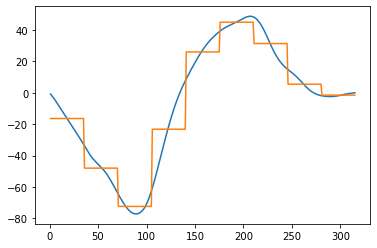

In [43]:
plt.plot(mergedDf["X_original"], label="True Values")
plt.plot(mergedDf["X_PAA"], label="PAA Values")

After showing each step, other pictures will be obtained by using visualization function.

## Visualization by function

All Gestures' axes will be controlled for 1 item in order to observe any problem for a specific gesture(like rapid changes). The main control of this is to understand the performance of the PAA in one dimension. The general performance of the function will be determined after controlling the second alternative on one axis visualization.

### X axis

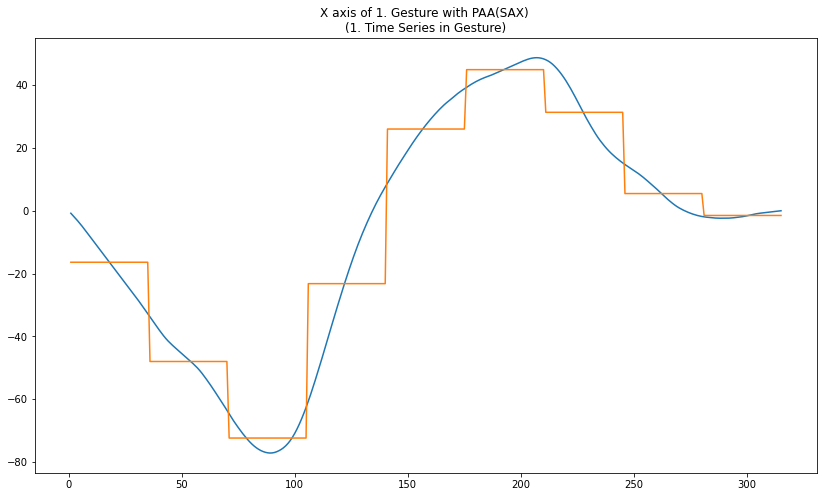

In [44]:
X_1_0=visualization(x_1, value_data_1, 1, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 1. Gesture, 0.item

### Y axis

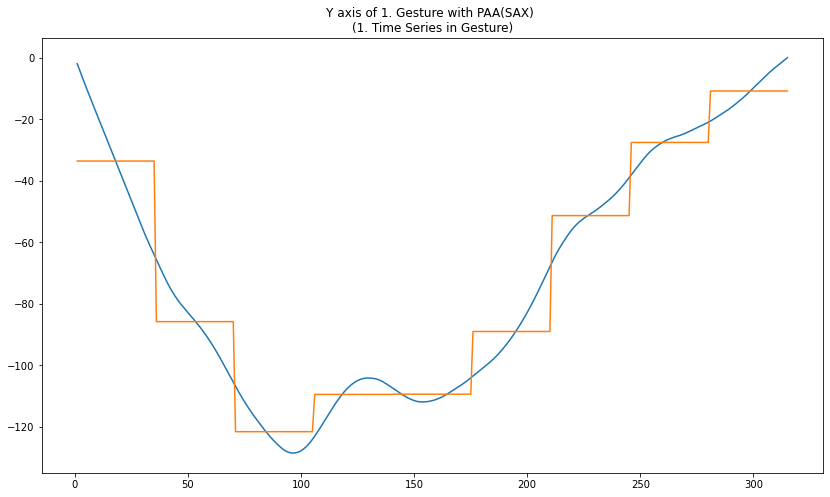

In [45]:
Y_1_0=visualization(y_1, value_data_1, 1, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 1. Gesture, 0.item

### Z axis

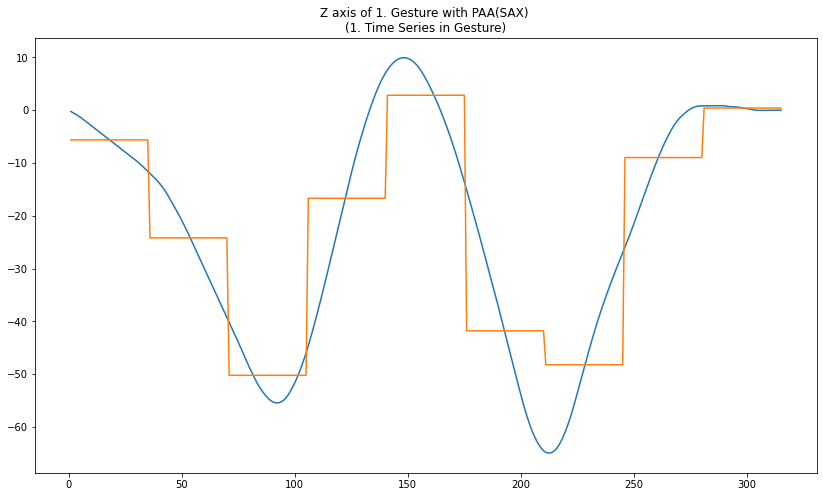

In [46]:
Z_1_0=visualization(z_1, value_data_1, 1, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 1. Gesture, 0.item

## Gesture 2 SAX with PAA

In [47]:
x_string_2, x_values_2=string_with_paa(x_2)
y_string_2, y_values_2=string_with_paa(y_2)
z_string_2, z_values_2=string_with_paa(z_2)

In [48]:
string_data_2 = [pd.DataFrame({"X":x_string_2[i], "Y":y_string_2[i], "Z":z_string_2[i]}) for i in range(x_2.shape[0])]

In [49]:
value_data_2 = [pd.DataFrame({"X":x_values_2[i], "Y":y_values_2[i], "Z":z_values_2[i]}) for i in range(x_2.shape[0])]

### Hard Voting 

In [50]:
for i in range(x_2.shape[0]):
    string_data_2[i]["hard_voting"]=majority_voting(string_data_2[i])

### X axis

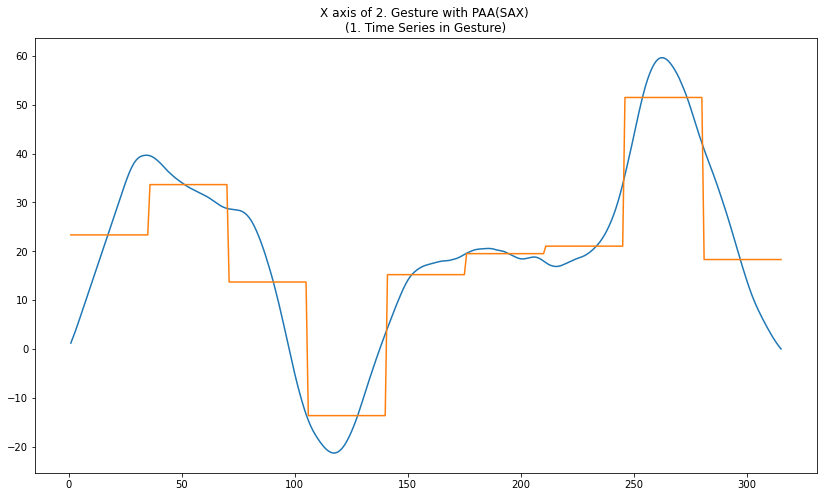

In [51]:
X_2_0=visualization(x_2, value_data_2, 2, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 2. Gesture, 0.item

### Y axis

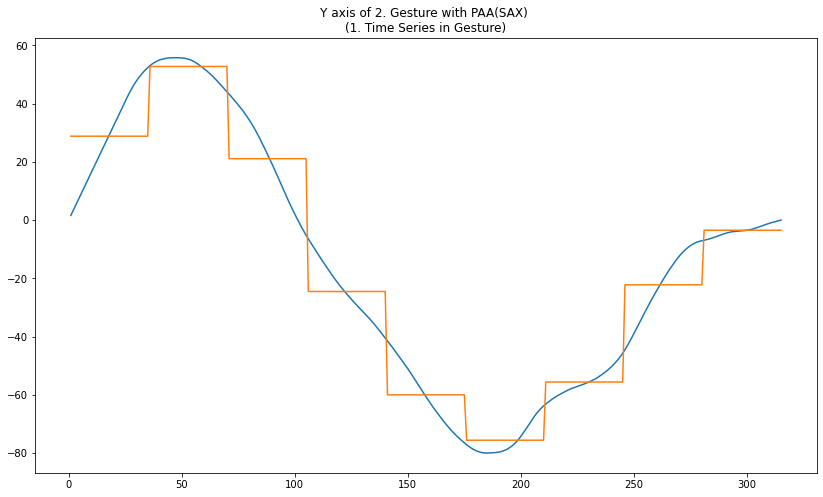

In [52]:
Y_2_0=visualization(y_2, value_data_2, 2, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 2. Gesture, 0.item

### Z axis

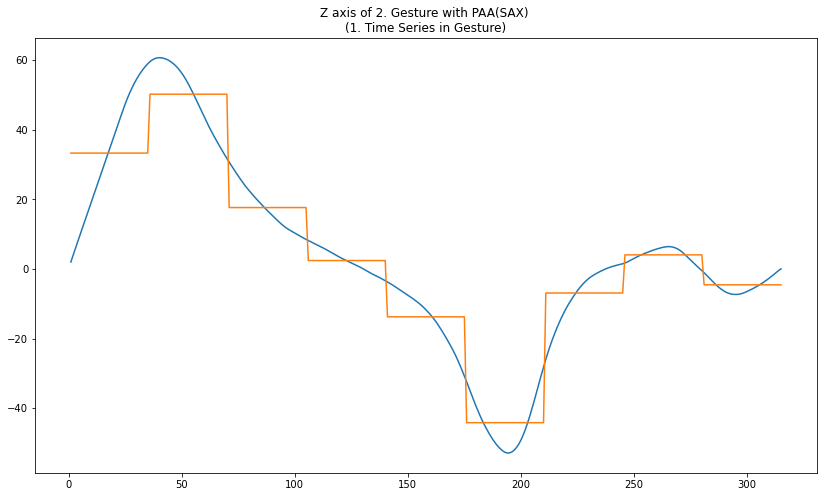

In [53]:
Z_2_0=visualization(z_2, value_data_2, 2, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 2. Gesture, 0.item

## Gesture 3 SAX with PAA

In [54]:
x_string_3, x_values_3=string_with_paa(x_3)
y_string_3, y_values_3=string_with_paa(y_3)
z_string_3, z_values_3=string_with_paa(z_3)

In [55]:
string_data_3 = [pd.DataFrame({"X":x_string_3[i], "Y":y_string_3[i], "Z":z_string_3[i]}) for i in range(x_3.shape[0])]

In [56]:
value_data_3 = [pd.DataFrame({"X":x_values_3[i], "Y":y_values_3[i], "Z":z_values_3[i]}) for i in range(x_3.shape[0])]

### Hard Voting 

In [57]:
for i in range(x_3.shape[0]):
    string_data_3[i]["hard_voting"]=majority_voting(string_data_3[i])

### X axis

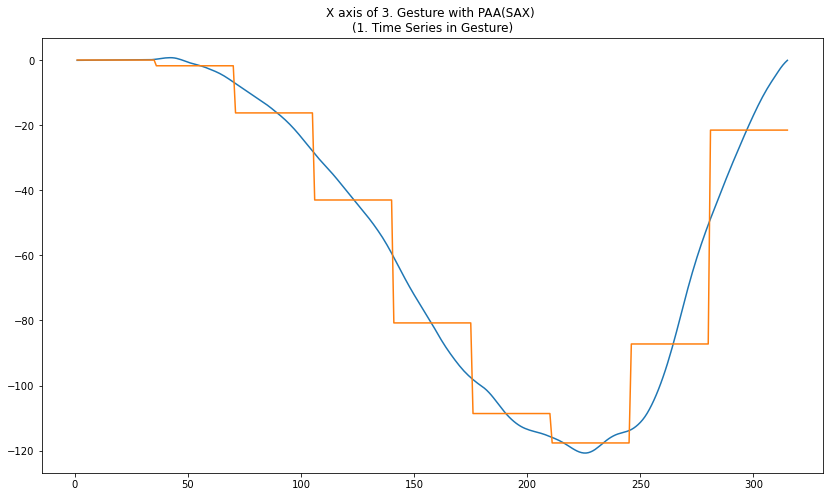

In [58]:
X_3_0=visualization(x_3, value_data_3, 3, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 3. Gesture, 0.item

### Y axis

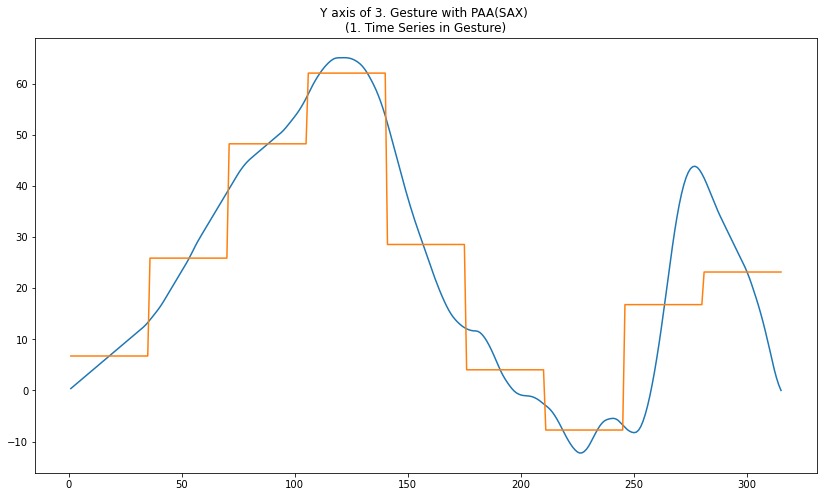

In [59]:
Y_3_0=visualization(y_3, value_data_3, 3, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 3. Gesture, 0.item

### Z axis

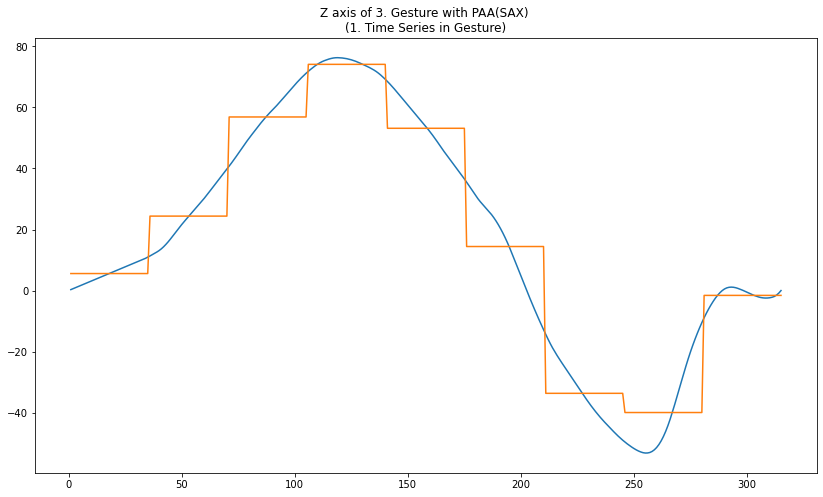

In [60]:
Z_3_0=visualization(z_3, value_data_3, 3, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 3. Gesture, 0.item

## Gesture 4 SAX with PAA

In [61]:
x_string_4, x_values_4=string_with_paa(x_4)
y_string_4, y_values_4=string_with_paa(y_4)
z_string_4, z_values_4=string_with_paa(z_4)

In [62]:
string_data_4 = [pd.DataFrame({"X":x_string_4[i], "Y":y_string_4[i], "Z":z_string_4[i]}) for i in range(x_4.shape[0])]

In [63]:
value_data_4 = [pd.DataFrame({"X":x_values_4[i], "Y":y_values_4[i], "Z":z_values_4[i]}) for i in range(x_4.shape[0])]

### Hard Voting 

In [64]:
for i in range(x_4.shape[0]):
    string_data_4[i]["hard_voting"]=majority_voting(string_data_4[i])

### X axis

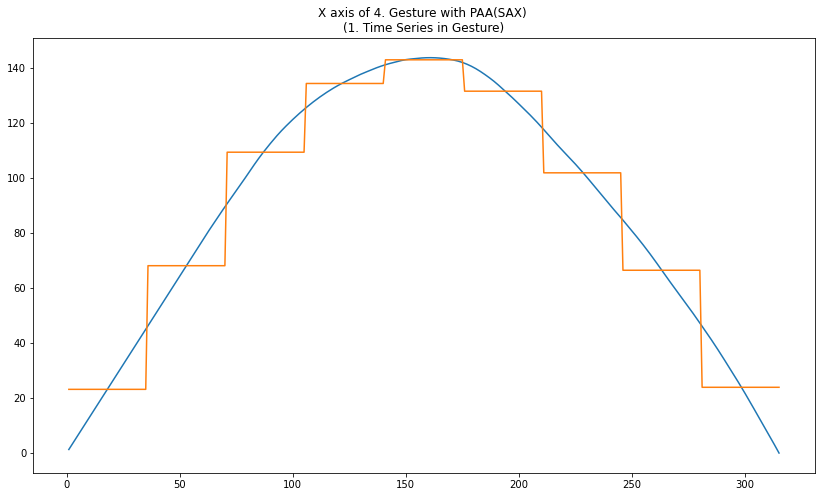

In [65]:
X_4_0=visualization(x_4, value_data_4, 4, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 4. Gesture, 0.item

### Y axis

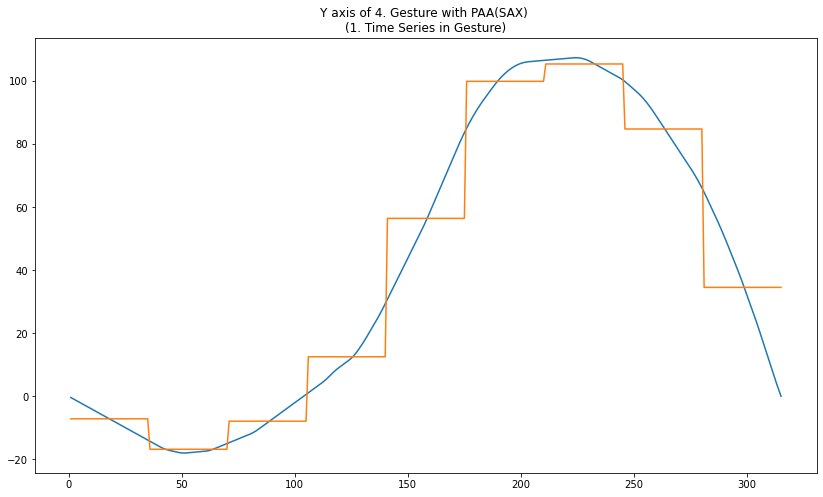

In [66]:
Y_4_0=visualization(y_4, value_data_4, 4, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 4. Gesture, 0.item

### Z axis

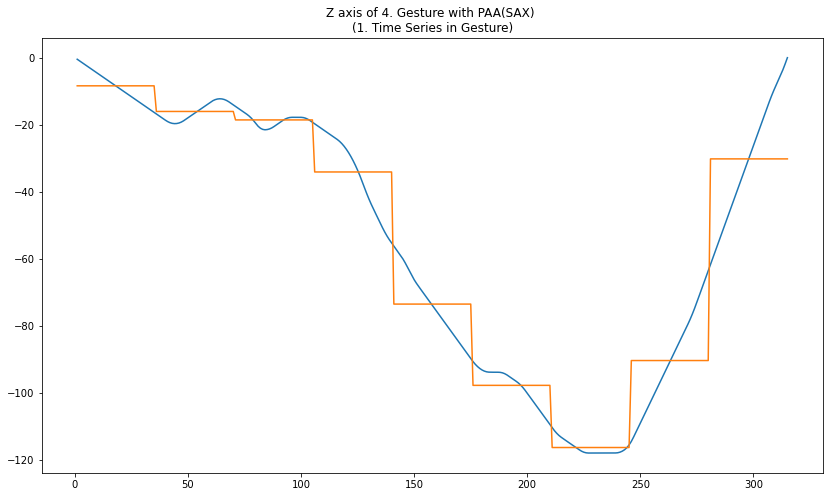

In [67]:
Z_4_0=visualization(z_4, value_data_4, 4, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 4. Gesture, 0.item

## Gesture 5 SAX with PAA

In [68]:
x_string_5, x_values_5=string_with_paa(x_5)
y_string_5, y_values_5=string_with_paa(y_5)
z_string_5, z_values_5=string_with_paa(z_5)

In [69]:
string_data_5 = [pd.DataFrame({"X":x_string_5[i], "Y":y_string_5[i], "Z":z_string_5[i]}) for i in range(x_5.shape[0])]

In [70]:
value_data_5 = [pd.DataFrame({"X":x_values_5[i], "Y":y_values_5[i], "Z":z_values_5[i]}) for i in range(x_5.shape[0])]

### Hard Voting 

In [71]:
for i in range(x_5.shape[0]):
    string_data_5[i]["hard_voting"]=majority_voting(string_data_5[i])

### X axis

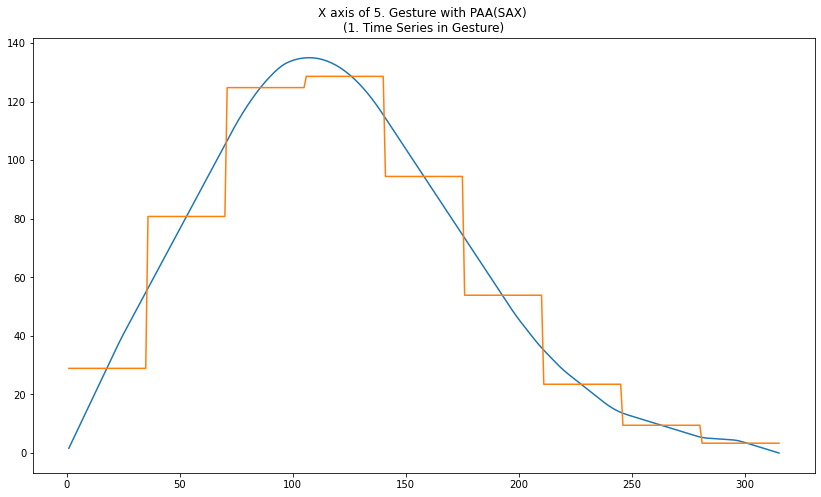

In [72]:
X_5_0=visualization(x_5, value_data_5, 5, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 5. Gesture, 0.item

### Y axis

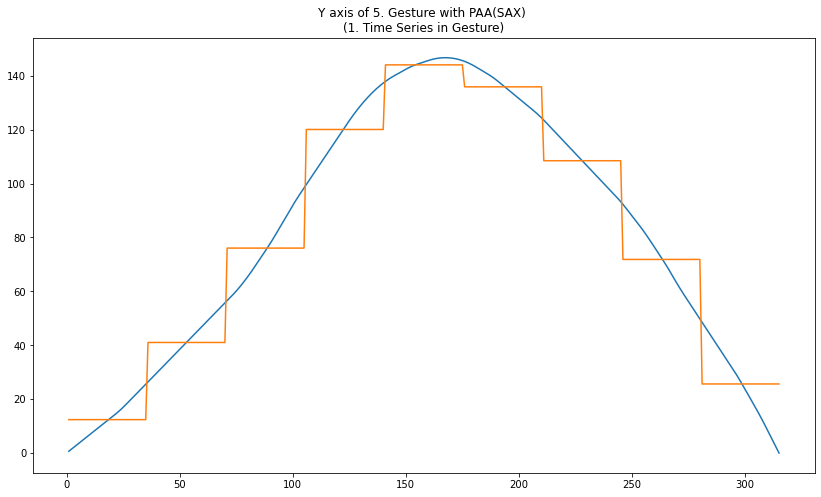

In [73]:
Y_5_0=visualization(y_5, value_data_5, 5, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 5. Gesture, 0.item

### Z axis

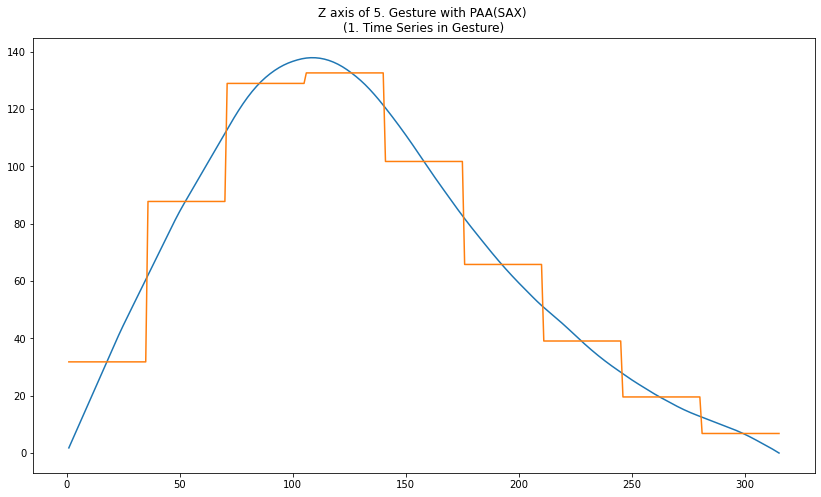

In [74]:
Z_5_0=visualization(z_5, value_data_5, 5, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 5. Gesture, 0.item

## Gesture 6 SAX with PAA

In [75]:
x_string_6, x_values_6=string_with_paa(x_6)
y_string_6, y_values_6=string_with_paa(y_6)
z_string_6, z_values_6=string_with_paa(z_6)

In [76]:
string_data_6 = [pd.DataFrame({"X":x_string_6[i], "Y":y_string_6[i], "Z":z_string_6[i]}) for i in range(x_6.shape[0])]

In [77]:
value_data_6 = [pd.DataFrame({"X":x_values_6[i], "Y":y_values_6[i], "Z":z_values_6[i]}) for i in range(x_6.shape[0])]

### Hard Voting 

In [78]:
for i in range(x_6.shape[0]):
    string_data_6[i]["hard_voting"]=majority_voting(string_data_6[i])

### X axis

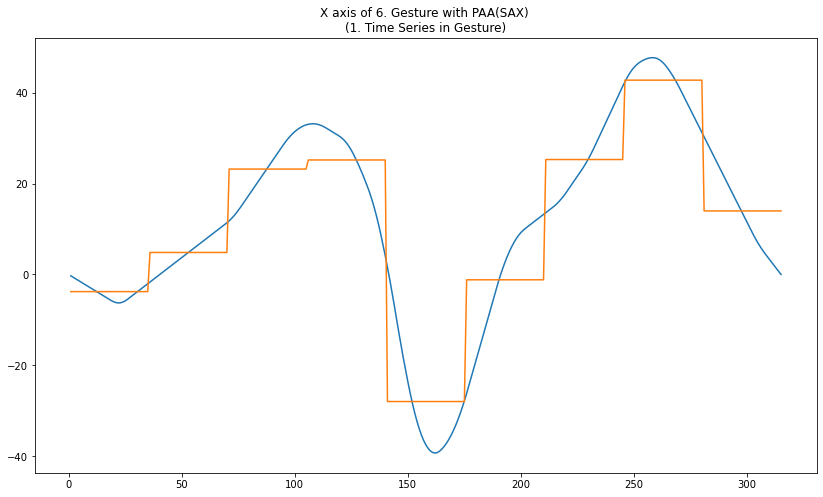

In [79]:
X_6_0=visualization(x_6, value_data_6, 6, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 6. Gesture, 0.item

### Y axis

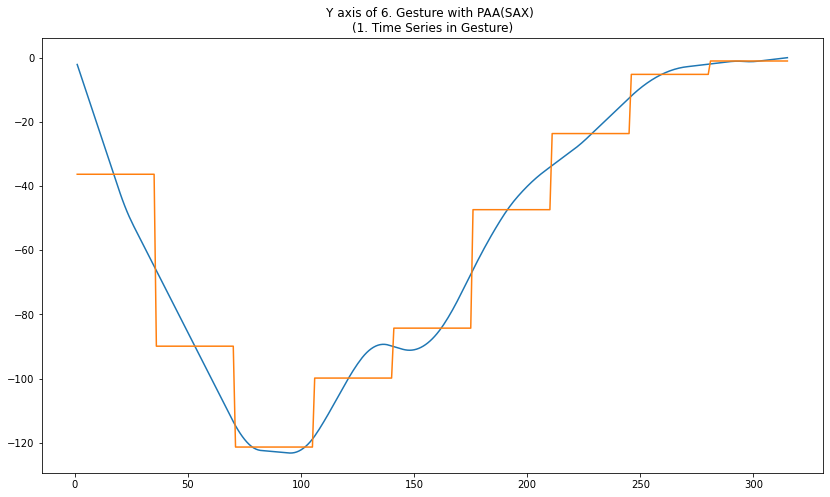

In [80]:
Y_6_0=visualization(y_6, value_data_6, 6, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 6. Gesture, 0.item

### Z axis

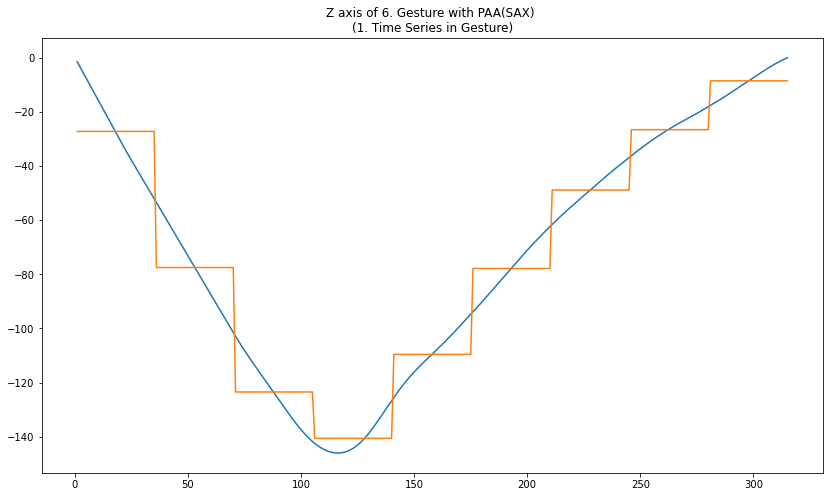

In [81]:
Z_6_0=visualization(z_6, value_data_6, 6, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 6. Gesture, 0.item

## Gesture 7 SAX with PAA

In [82]:
x_string_7, x_values_7=string_with_paa(x_7)
y_string_7, y_values_7=string_with_paa(y_7)
z_string_7, z_values_7=string_with_paa(z_7)

In [83]:
string_data_7 = [pd.DataFrame({"X":x_string_7[i], "Y":y_string_7[i], "Z":z_string_7[i]}) for i in range(x_7.shape[0])]

In [84]:
value_data_7 = [pd.DataFrame({"X":x_values_7[i], "Y":y_values_7[i], "Z":z_values_7[i]}) for i in range(x_7.shape[0])]

### Hard Voting 

In [85]:
for i in range(x_7.shape[0]):
    string_data_7[i]["hard_voting"]=majority_voting(string_data_7[i])

### X axis

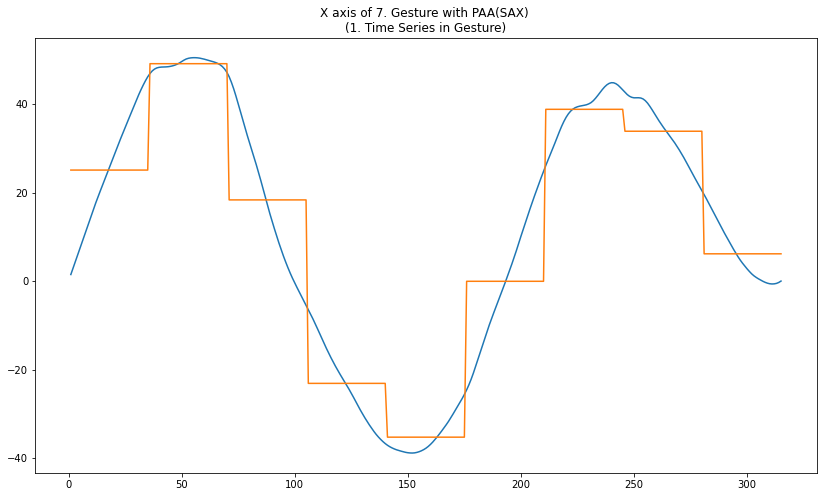

In [86]:
X_7_0=visualization(x_7, value_data_7, 7, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 7. Gesture, 0.item

### Y axis

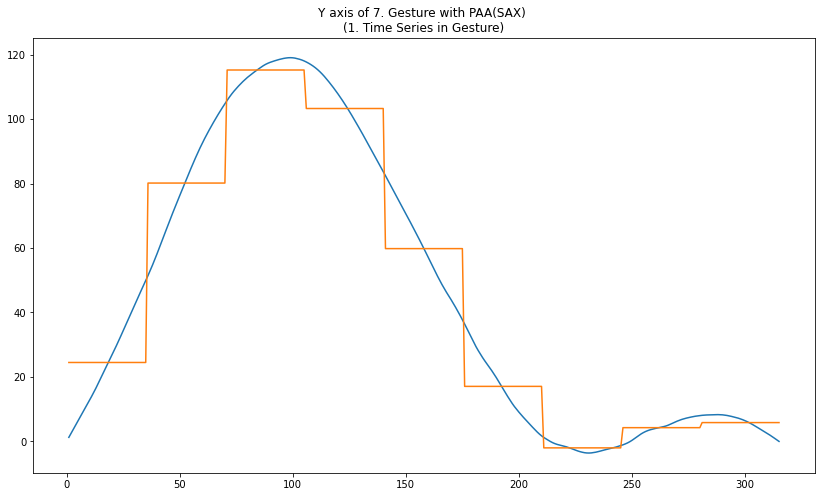

In [87]:
Y_7_0=visualization(y_7, value_data_7, 7, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 7. Gesture, 0.item

### Z axis

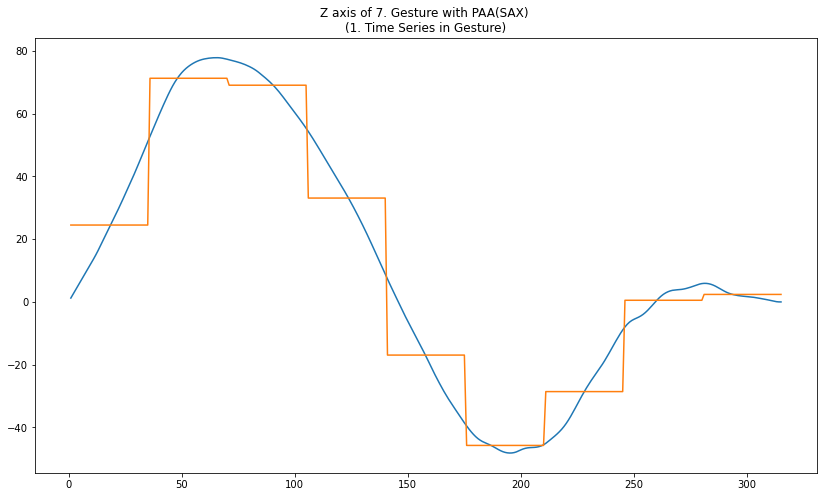

In [88]:
Z_7_0=visualization(z_7, value_data_7, 7, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 7. Gesture, 0.item

## Gesture 8 SAX with PAA

In [89]:
x_string_8, x_values_8=string_with_paa(x_8)
y_string_8, y_values_8=string_with_paa(y_8)
z_string_8, z_values_8=string_with_paa(z_8)

In [90]:
string_data_8 = [pd.DataFrame({"X":x_string_8[i], "Y":y_string_8[i], "Z":z_string_8[i]}) for i in range(x_8.shape[0])]

In [91]:
value_data_8 = [pd.DataFrame({"X":x_values_8[i], "Y":y_values_8[i], "Z":z_values_8[i]}) for i in range(x_8.shape[0])]

### Hard Voting 

In [92]:
for i in range(x_8.shape[0]):
    string_data_8[i]["hard_voting"]=majority_voting(string_data_8[i])

### X axis

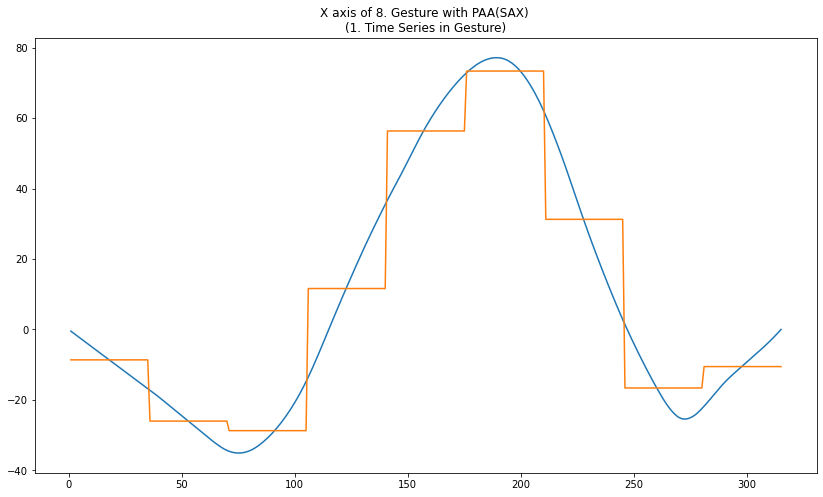

In [93]:
X_8_0=visualization(x_8, value_data_8, 8, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 8. Gesture, 0.item

### Y axis

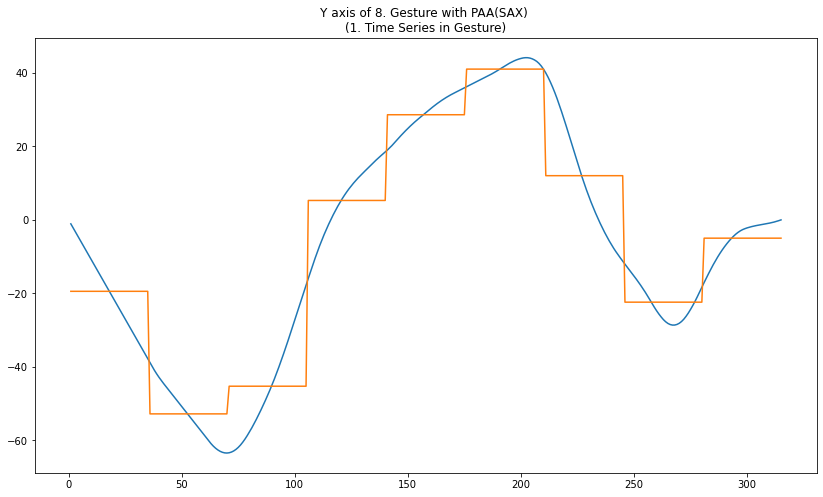

In [94]:
Y_8_0=visualization(y_8, value_data_8, 8, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 8. Gesture, 0.item

### Z axis

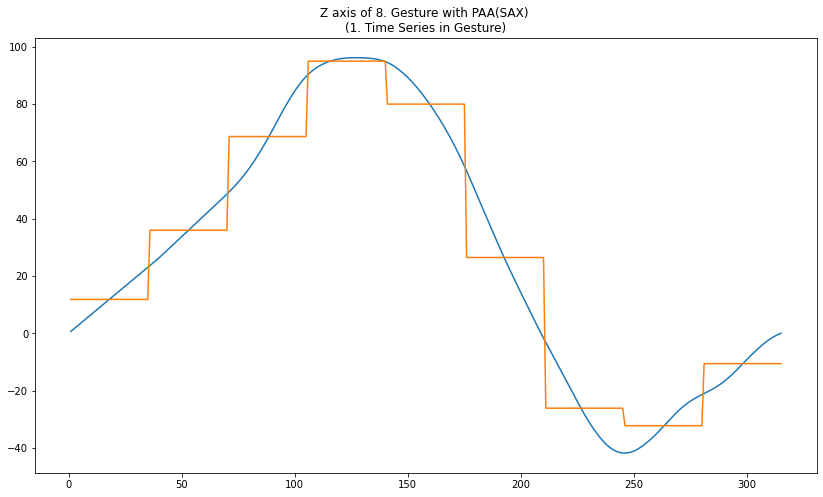

In [95]:
Z_8_0=visualization(z_8, value_data_8, 8, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 8. Gesture, 0.item

# General Comment for Axis Representation

If there is an huge increase or decrease it is hard to represent this period by a single line. This problem can be handled by increasing the number of slot bu it can cause an overfitting problem. In addition, it is hard to understand the gesture by separately looking the axis information. Final Gesture recognition will be handled at the end of the notebook by using moderate hard majority voting technique. In addition, numerical values didn't calculated because **only visual inspection was demanded in homework description.** 

<a id="4"></a>
# Adaptive Piecewise Representation with Linear Regressor Tree

In the second Technique, Linear Regression Tree will be tried in axis base and performance of the Adaptive Piecewise Representation with Linear Regression Tree will be compared with previously obtained results. Plotting both of them in the same plot will not be tried because **the main aim to get these plots to understand performance of the techniques rather than recognition.** 

Moreover, Principal Component Analysis part will be tried in this part to reduce lenght of the Notebook. 1 Dimensional representation of Gestures will be controlled **at the end of the Notebook.** In addition, plotting the both techniques at the same plot will be also tried **at the end of the Notebook.**

2 different functions are created for this part, decision_tree() and visualization_regressor(). Both of them reduces the lenght of the Notebook. In addition, understandable variable names and some notes will be added these functions to make it easily controllable.

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [97]:
from sklearn.decomposition import PCA

In [98]:
def decision_tree(model, id_value, dataset):
    time=dataset[id_value][["time"]]
    values=dataset[id_value][["values"]]
    model.fit(time, values)
    
    predictions=model.predict(time)
    
    return predictions

In [99]:
def visualization_regressor(origin, created, gesture_no, ax_code, id_value):
    """ 
    x value is represented by 0
    y value is represented by 1
    z value is represented by 2
    id_value represent which item is selected(in sequence) in filtered dataset by gesture class information(V1 in intial data)
    """
    key_values = {"X": 0, "Y": 1, "Z":2}
    
    ax_sequence=key_values.get(ax_code)
    
    location=pd.DataFrame(origin.loc[:, "values"]).reset_index(drop=True) #
    location.set_axis(["original_values"], axis=1, inplace=True)
    location.index+=1

    obtanied_locations=pd.DataFrame(created)
    obtanied_locations.set_axis(["Regressor_value"], axis=1, inplace=True)
    obtanied_locations.index+=1
    mergedDf = pd.merge(location, obtanied_locations, how="left", left_index=True, right_index=True)

    plt.figure(figsize=(14, 8)) 
    plt.plot(mergedDf["original_values"], label="True Values")
    plt.plot(mergedDf["Regressor_value"], label="Regressor Value")
    plt.title(f"{ax_code} axis of {gesture_no}. Gesture with Regressor Tree \n({id_value+1}. Time Series in Gesture)")
    
    return(mergedDf)

# Gesture 1 with Regression Tree

In [100]:
x_1_r=[pd.DataFrame({"time":range(1, len(x_1.T.iloc[:, i])+1), "values":x_1.T.iloc[:, i]}) for i in range(x_1.shape[0])]
y_1_r=[pd.DataFrame({"time":range(1, len(y_1.T.iloc[:, i])+1), "values":y_1.T.iloc[:, i]}) for i in range(y_1.shape[0])]
z_1_r=[pd.DataFrame({"time":range(1, len(z_1.T.iloc[:, i])+1), "values":z_1.T.iloc[:, i]}) for i in range(z_1.shape[0])]

## Individual Decision Models

In [101]:
tree_reg_x_1 = [DecisionTreeRegressor(max_depth=3) for i in range(x_1.shape[0])]
tree_reg_y_1 = [DecisionTreeRegressor(max_depth=3) for i in range(x_1.shape[0])]
tree_reg_z_1 = [DecisionTreeRegressor(max_depth=3) for i in range(x_1.shape[0])]

In [102]:
x_1_0_reg_pred=decision_tree(tree_reg_x_1[0], 0, x_1_r)
y_1_0_reg_pred=decision_tree(tree_reg_y_1[0], 0, y_1_r)
z_1_0_reg_pred=decision_tree(tree_reg_z_1[0], 0, z_1_r)

## PCA for Gesture 1

In [103]:
pca_1 = [pd.DataFrame({"time":x_1_r[i].iloc[:, 0].values,
                         "values_x":x_1_r[i].iloc[:, 1].values,
                         "values_y":y_1_r[i].iloc[:, 1].values,
                         "values_z":z_1_r[i].iloc[:, 1].values,})  for i in range(x_1.shape[0])]

In [104]:
for i in range(len(pca_1)):
    pca=PCA(n_components = 1)
    pca_1[i]["PCA"]=pca.fit_transform(pca_1[i].iloc[:, 1:4])

In [105]:
pca.explained_variance_ratio_

array([0.6013385])

In [106]:
pca.components_.T[:, 0]

array([ 0.82205994, -0.56627159,  0.05961491])

## Display of Axis

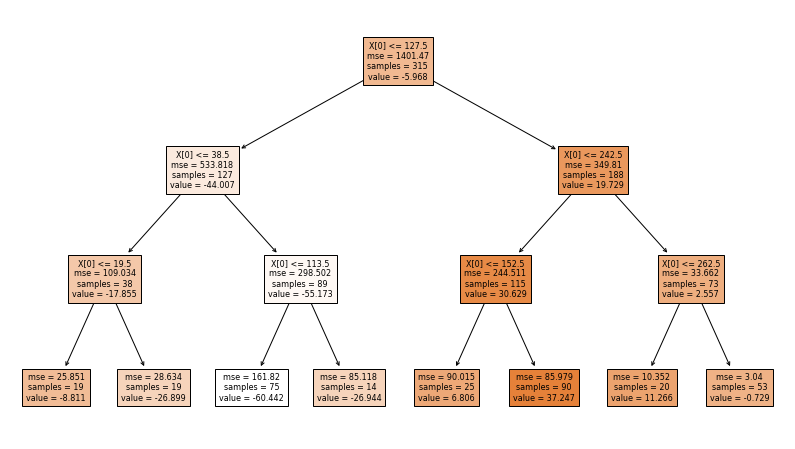

In [107]:
plt.figure(figsize=(14, 8)) 
plt.show(tree.plot_tree(tree_reg_x_1[0],filled=True, fontsize=8))

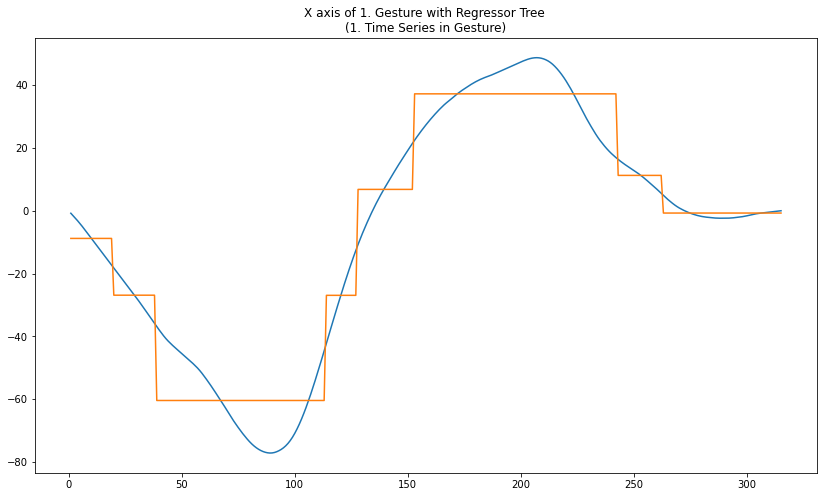

In [108]:
x_1_0_r=visualization_regressor(x_1_r[0], x_1_0_reg_pred, 1, "X", 0)

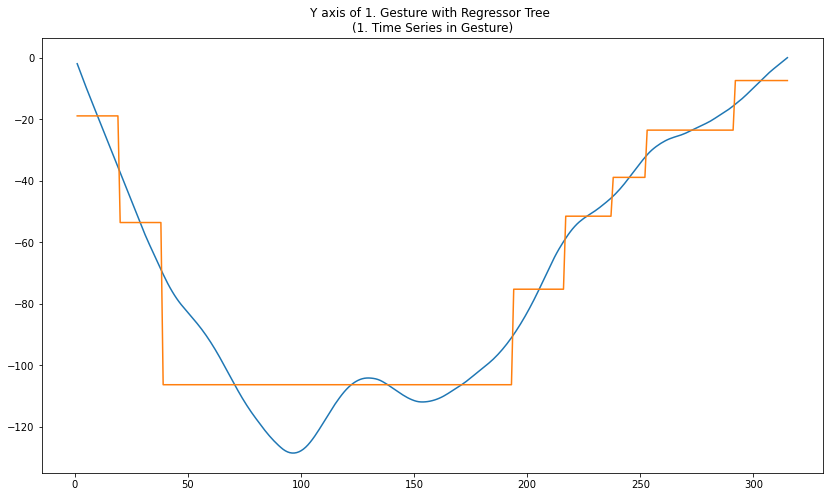

In [109]:
y_1_0_r=visualization_regressor(y_1_r[0], y_1_0_reg_pred, 1, "Y", 0)

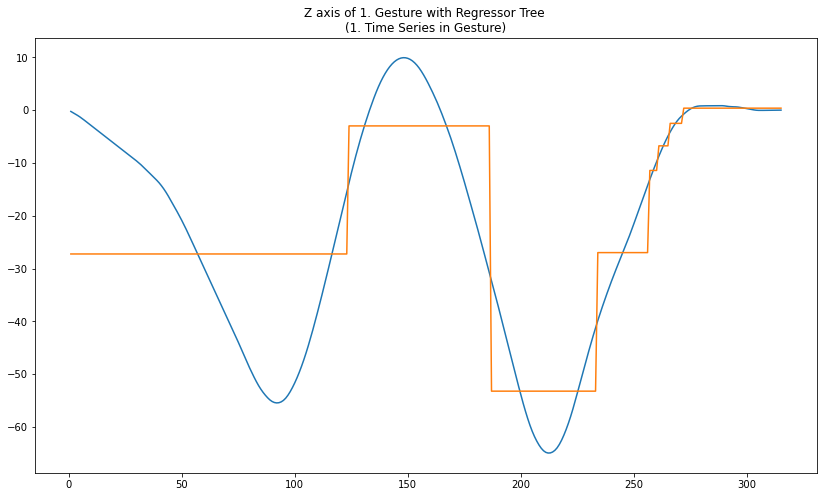

In [110]:
z_1_0_r=visualization_regressor(z_1_r[0], z_1_0_reg_pred, 1, "Z", 0)

# Gesture 2 with Regression Tree

In [111]:
x_2_r=[pd.DataFrame({"time":range(1, len(x_2.T.iloc[:, i])+1), "values":x_2.T.iloc[:, i]}) for i in range(x_2.shape[0])]
y_2_r=[pd.DataFrame({"time":range(1, len(y_2.T.iloc[:, i])+1), "values":y_2.T.iloc[:, i]}) for i in range(y_2.shape[0])]
z_2_r=[pd.DataFrame({"time":range(1, len(z_2.T.iloc[:, i])+1), "values":z_2.T.iloc[:, i]}) for i in range(z_2.shape[0])]

## Individual Decision Models

In [112]:
tree_reg_x_2 = [DecisionTreeRegressor(max_depth=3) for i in range(x_2.shape[0])]
tree_reg_y_2 = [DecisionTreeRegressor(max_depth=3) for i in range(x_2.shape[0])]
tree_reg_z_2 = [DecisionTreeRegressor(max_depth=3) for i in range(x_2.shape[0])]

In [113]:
x_2_0_reg_pred=decision_tree(tree_reg_x_2[0], 0, x_2_r)
y_2_0_reg_pred=decision_tree(tree_reg_y_2[0], 0, y_2_r)
z_2_0_reg_pred=decision_tree(tree_reg_z_2[0], 0, z_2_r)

## PCA for Gesture 2

In [114]:
pca_2 = [pd.DataFrame({"time":x_2_r[i].iloc[:, 0].values,
                         "values_x":x_2_r[i].iloc[:, 1].values,
                         "values_y":y_2_r[i].iloc[:, 1].values,
                         "values_z":z_2_r[i].iloc[:, 1].values,})  for i in range(x_2.shape[0])]

In [115]:
for i in range(len(pca_2)):
    pca=PCA(n_components = 1)
    pca_2[i]["PCA"]=pca.fit_transform(pca_2[i].iloc[:, 1:4])

In [116]:
pca.explained_variance_ratio_

array([0.82045414])

In [117]:
pca.components_.T[:, 0]

array([0.28086265, 0.81655115, 0.50434153])

## Display of Axis

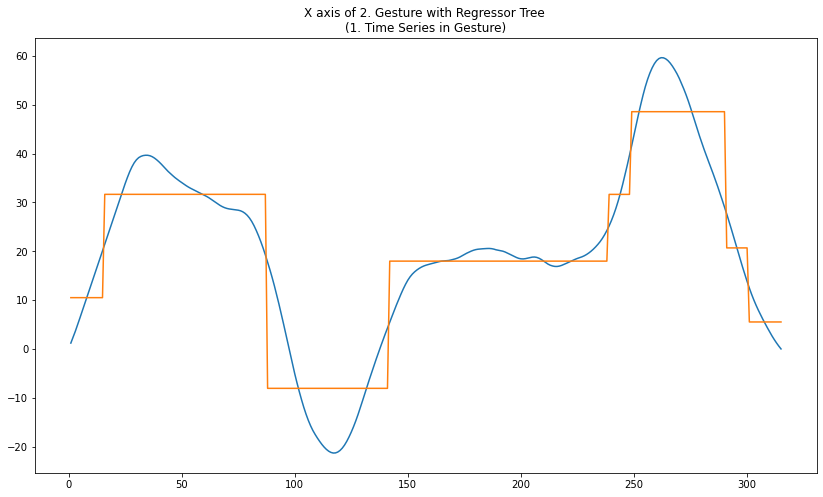

In [118]:
x_2_0_r=visualization_regressor(x_2_r[0], x_2_0_reg_pred, 2, "X", 0)

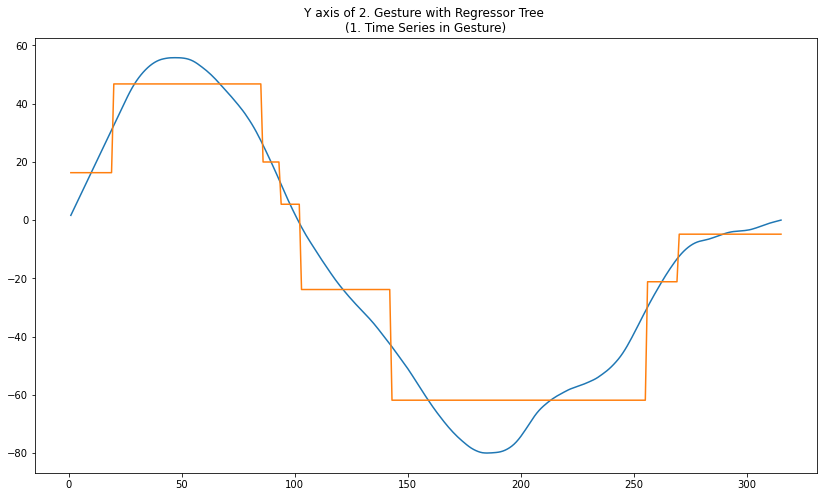

In [119]:
y_2_0_r=visualization_regressor(y_2_r[0], y_2_0_reg_pred, 2, "Y", 0)

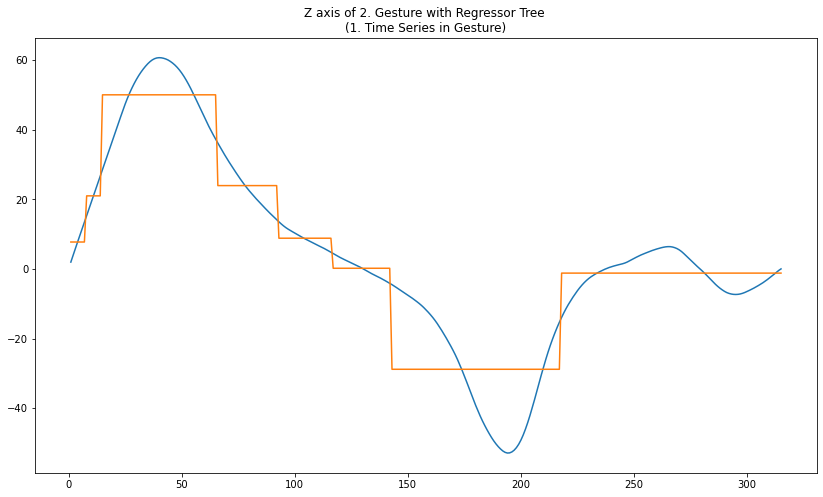

In [120]:
z_2_0_r=visualization_regressor(z_2_r[0], z_2_0_reg_pred, 2, "Z", 0)

# Gesture 3 with Regression Tree

In [121]:
x_3_r=[pd.DataFrame({"time":range(1, len(x_3.T.iloc[:, i])+1), "values":x_3.T.iloc[:, i]}) for i in range(x_3.shape[0])]
y_3_r=[pd.DataFrame({"time":range(1, len(y_3.T.iloc[:, i])+1), "values":y_3.T.iloc[:, i]}) for i in range(y_3.shape[0])]
z_3_r=[pd.DataFrame({"time":range(1, len(z_3.T.iloc[:, i])+1), "values":z_3.T.iloc[:, i]}) for i in range(z_3.shape[0])]

## Individual Decision Models

In [122]:
tree_reg_x_3 = [DecisionTreeRegressor(max_depth=3) for i in range(x_3.shape[0])]
tree_reg_y_3 = [DecisionTreeRegressor(max_depth=3) for i in range(x_3.shape[0])]
tree_reg_z_3 = [DecisionTreeRegressor(max_depth=3) for i in range(x_3.shape[0])]

In [123]:
x_3_0_reg_pred=decision_tree(tree_reg_x_3[0], 0, x_3_r)
y_3_0_reg_pred=decision_tree(tree_reg_y_3[0], 0, y_3_r)
z_3_0_reg_pred=decision_tree(tree_reg_z_3[0], 0, z_3_r)

## PCA for Gesture 3

In [124]:
pca_3 = [pd.DataFrame({"time":x_3_r[i].iloc[:, 0].values,
                         "values_x":x_3_r[i].iloc[:, 1].values,
                         "values_y":y_3_r[i].iloc[:, 1].values,
                         "values_z":z_3_r[i].iloc[:, 1].values,})  for i in range(x_3.shape[0])]

In [125]:
for i in range(len(pca_3)):
    pca=PCA(n_components = 1)
    pca_3[i]["PCA"]=pca.fit_transform(pca_3[i].iloc[:, 1:4])

In [126]:
pca.explained_variance_ratio_

array([0.61629961])

In [127]:
pca.components_.T[:, 0]

array([-0.71875134, -0.00611104,  0.69524037])

## Display of Axis

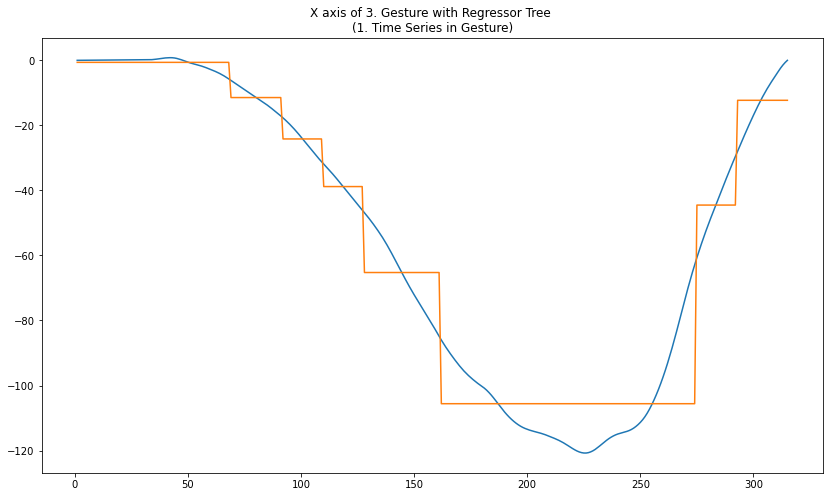

In [128]:
x_3_0_r=visualization_regressor(x_3_r[0], x_3_0_reg_pred, 3, "X", 0)

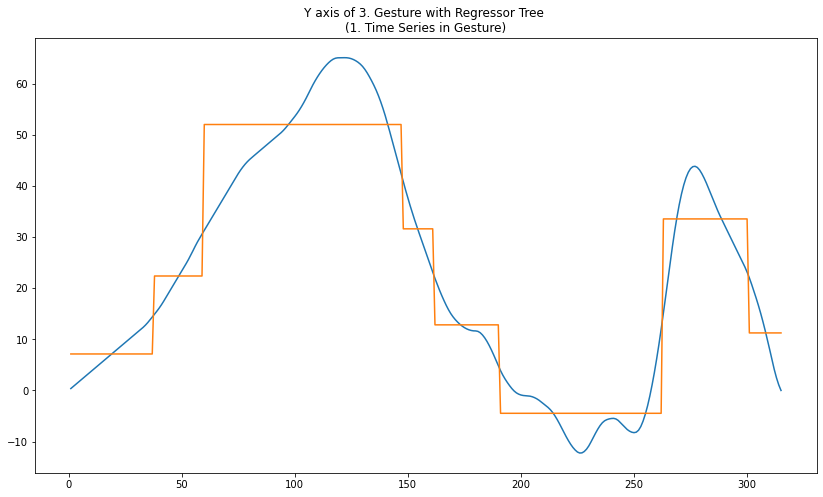

In [129]:
y_3_0_r=visualization_regressor(y_3_r[0], y_3_0_reg_pred, 3, "Y", 0)

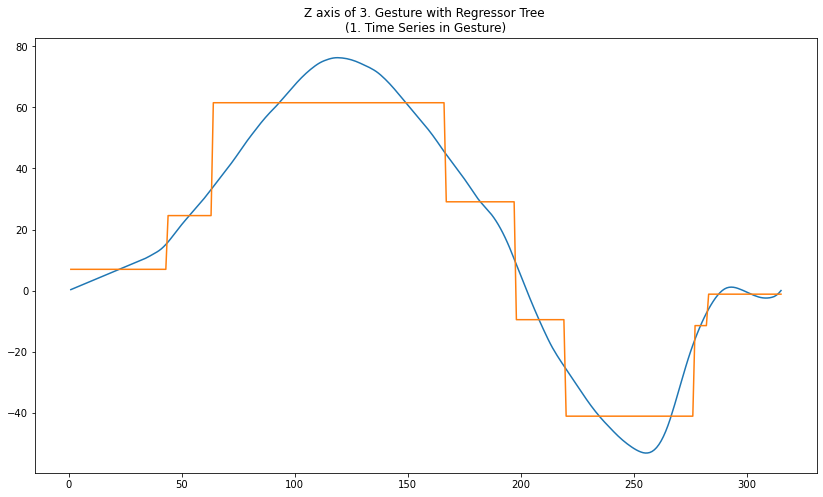

In [130]:
z_3_0_r=visualization_regressor(z_3_r[0], z_3_0_reg_pred, 3, "Z", 0)

# Gesture 4 with Regression Tree

In [131]:
x_4_r=[pd.DataFrame({"time":range(1, len(x_4.T.iloc[:, i])+1), "values":x_4.T.iloc[:, i]}) for i in range(x_4.shape[0])]
y_4_r=[pd.DataFrame({"time":range(1, len(y_4.T.iloc[:, i])+1), "values":y_4.T.iloc[:, i]}) for i in range(y_4.shape[0])]
z_4_r=[pd.DataFrame({"time":range(1, len(z_4.T.iloc[:, i])+1), "values":z_4.T.iloc[:, i]}) for i in range(z_4.shape[0])]

## Individual Decision Models

In [132]:
tree_reg_x_4 = [DecisionTreeRegressor(max_depth=3) for i in range(x_4.shape[0])]
tree_reg_y_4 = [DecisionTreeRegressor(max_depth=3) for i in range(x_4.shape[0])]
tree_reg_z_4 = [DecisionTreeRegressor(max_depth=3) for i in range(x_4.shape[0])]

In [133]:
x_4_0_reg_pred=decision_tree(tree_reg_x_4[0], 0, x_4_r)
y_4_0_reg_pred=decision_tree(tree_reg_y_4[0], 0, y_4_r)
z_4_0_reg_pred=decision_tree(tree_reg_z_4[0], 0, z_4_r)

## PCA for Gesture 4

In [134]:
pca_4 = [pd.DataFrame({"time":x_4_r[i].iloc[:, 0].values,
                         "values_x":x_4_r[i].iloc[:, 1].values,
                         "values_y":y_4_r[i].iloc[:, 1].values,
                         "values_z":z_4_r[i].iloc[:, 1].values,})  for i in range(x_4.shape[0])]

In [135]:
for i in range(len(pca_4)):
    pca=PCA(n_components = 1)
    pca_4[i]["PCA"]=pca.fit_transform(pca_4[i].iloc[:, 1:4])

In [136]:
pca.explained_variance_ratio_

array([0.75848601])

In [137]:
pca.components_.T[:, 0]

array([ 0.52188473,  0.6510052 , -0.55120646])

## Display of Axis

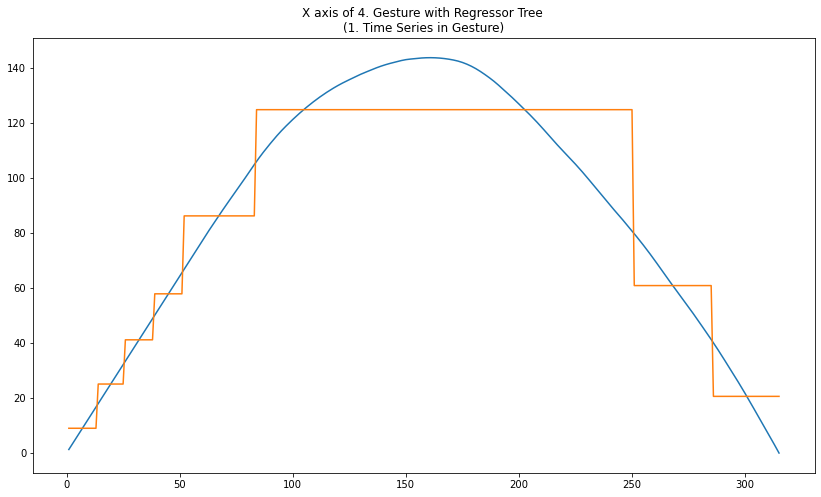

In [138]:
x_4_0_r=visualization_regressor(x_4_r[0], x_4_0_reg_pred, 4, "X", 0)

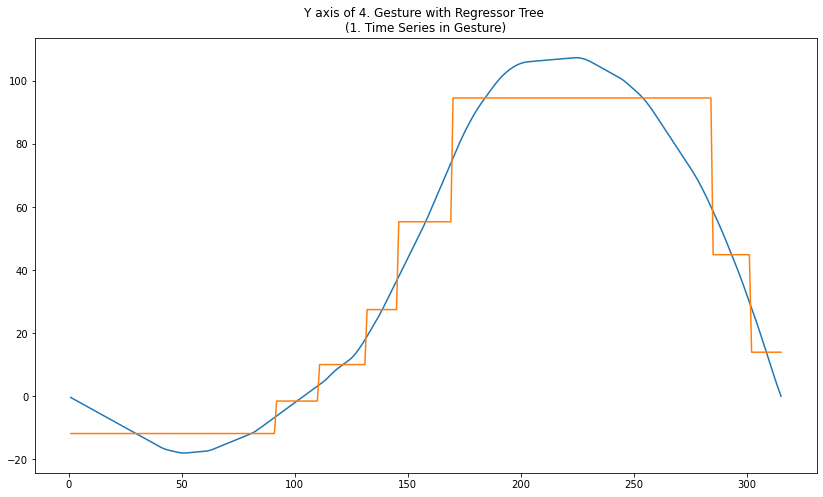

In [139]:
y_4_0_r=visualization_regressor(y_4_r[0], y_4_0_reg_pred, 4, "Y", 0)

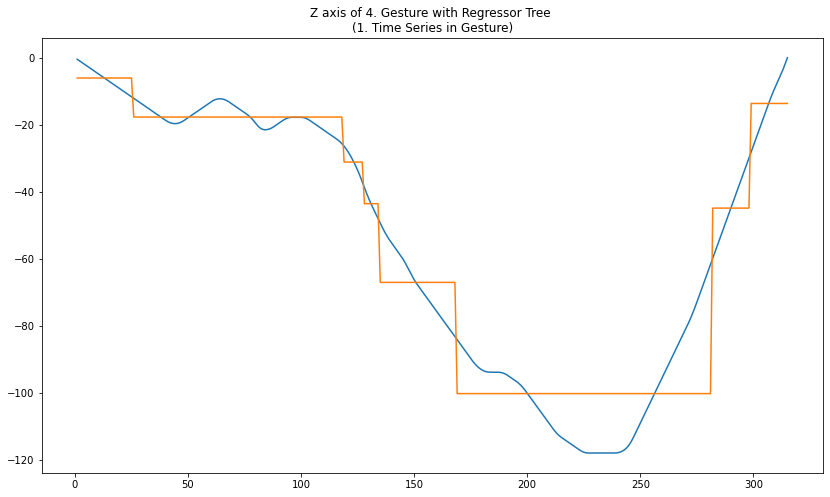

In [140]:
z_4_0_r=visualization_regressor(z_4_r[0], z_4_0_reg_pred, 4, "Z", 0)

# Gesture 5 with Regression Tree

In [141]:
x_5_r=[pd.DataFrame({"time":range(1, len(x_5.T.iloc[:, i])+1), "values":x_5.T.iloc[:, i]}) for i in range(x_5.shape[0])]
y_5_r=[pd.DataFrame({"time":range(1, len(y_5.T.iloc[:, i])+1), "values":y_5.T.iloc[:, i]}) for i in range(y_5.shape[0])]
z_5_r=[pd.DataFrame({"time":range(1, len(z_5.T.iloc[:, i])+1), "values":z_5.T.iloc[:, i]}) for i in range(z_5.shape[0])]

## Individual Decision Models

In [142]:
tree_reg_x_5 = [DecisionTreeRegressor(max_depth=3) for i in range(x_5.shape[0])]
tree_reg_y_5 = [DecisionTreeRegressor(max_depth=3) for i in range(x_5.shape[0])]
tree_reg_z_5 = [DecisionTreeRegressor(max_depth=3) for i in range(x_5.shape[0])]

In [143]:
x_5_0_reg_pred=decision_tree(tree_reg_x_5[0], 0, x_5_r)
y_5_0_reg_pred=decision_tree(tree_reg_y_5[0], 0, y_5_r)
z_5_0_reg_pred=decision_tree(tree_reg_z_5[0], 0, z_5_r)

## PCA for Gesture 5

In [144]:
pca_5 = [pd.DataFrame({"time":x_5_r[i].iloc[:, 0].values,
                         "values_x":x_5_r[i].iloc[:, 1].values,
                         "values_y":y_5_r[i].iloc[:, 1].values,
                         "values_z":z_5_r[i].iloc[:, 1].values,})  for i in range(x_5.shape[0])]

In [145]:
for i in range(len(pca_5)):
    pca=PCA(n_components = 1)
    pca_5[i]["PCA"]=pca.fit_transform(pca_5[i].iloc[:, 1:4])

In [146]:
pca.explained_variance_ratio_

array([0.8633823])

In [147]:
pca.components_.T[:, 0]

array([0.31703741, 0.66748272, 0.67376116])

## Display of Axis

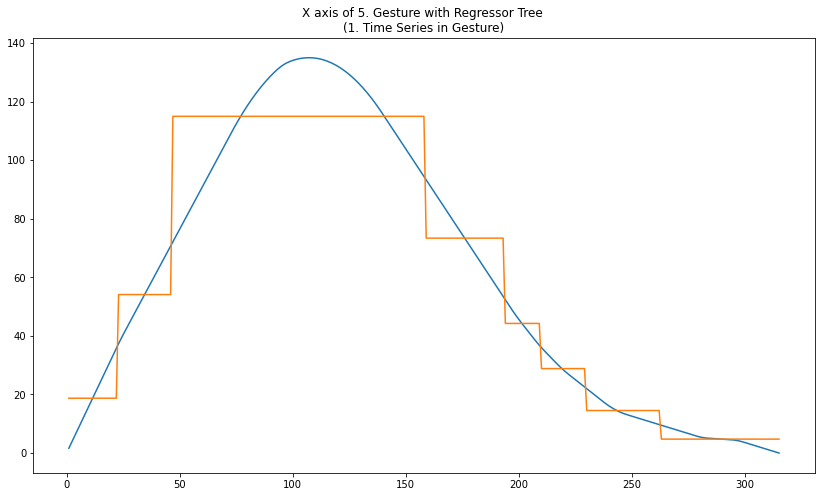

In [148]:
x_5_0_r=visualization_regressor(x_5_r[0], x_5_0_reg_pred, 5, "X", 0)

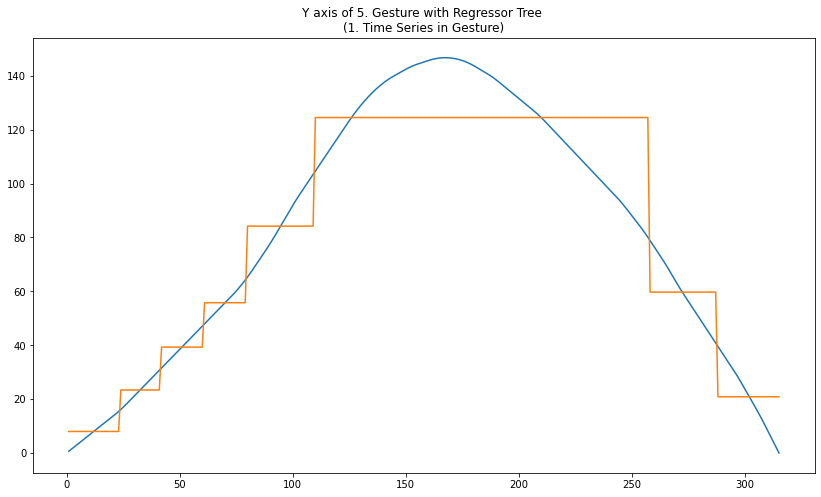

In [149]:
y_5_0_r=visualization_regressor(y_5_r[0], y_5_0_reg_pred, 5, "Y", 0)

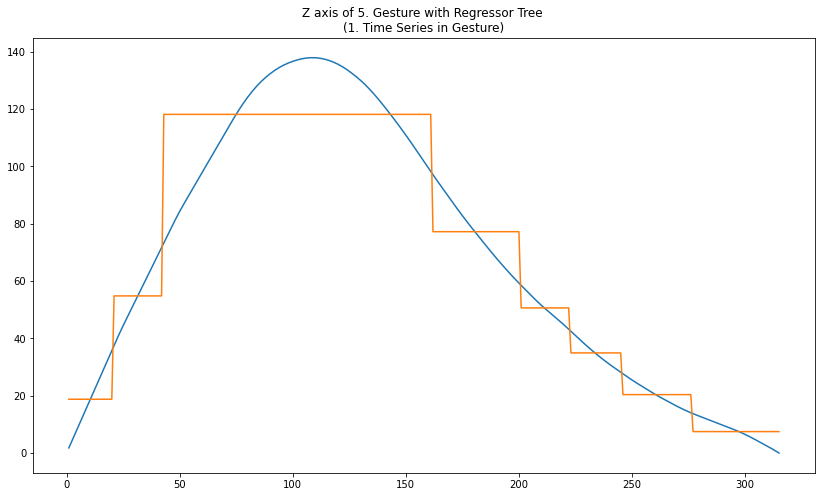

In [150]:
z_5_0_r=visualization_regressor(z_5_r[0], z_5_0_reg_pred, 5, "Z", 0)

# Gesture 6 with Regression Tree

In [151]:
x_6_r=[pd.DataFrame({"time":range(1, len(x_6.T.iloc[:, i])+1), "values":x_6.T.iloc[:, i]}) for i in range(x_6.shape[0])]
y_6_r=[pd.DataFrame({"time":range(1, len(y_6.T.iloc[:, i])+1), "values":y_6.T.iloc[:, i]}) for i in range(y_6.shape[0])]
z_6_r=[pd.DataFrame({"time":range(1, len(z_6.T.iloc[:, i])+1), "values":z_6.T.iloc[:, i]}) for i in range(z_6.shape[0])]

## Individual Decision Models

In [152]:
tree_reg_x_6 = [DecisionTreeRegressor(max_depth=3) for i in range(x_6.shape[0])]
tree_reg_y_6 = [DecisionTreeRegressor(max_depth=3) for i in range(x_6.shape[0])]
tree_reg_z_6 = [DecisionTreeRegressor(max_depth=3) for i in range(x_6.shape[0])]

In [153]:
x_6_0_reg_pred=decision_tree(tree_reg_x_6[0], 0, x_6_r)
y_6_0_reg_pred=decision_tree(tree_reg_y_6[0], 0, y_6_r)
z_6_0_reg_pred=decision_tree(tree_reg_z_6[0], 0, z_6_r)

## PCA for Gesture 6

In [154]:
pca_6 = [pd.DataFrame({"time":x_6_r[i].iloc[:, 0].values,
                         "values_x":x_6_r[i].iloc[:, 1].values,
                         "values_y":y_6_r[i].iloc[:, 1].values,
                         "values_z":z_6_r[i].iloc[:, 1].values,})  for i in range(x_6.shape[0])]

In [155]:
for i in range(len(pca_6)):
    pca=PCA(n_components = 1)
    pca_6[i]["PCA"]=pca.fit_transform(pca_6[i].iloc[:, 1:4])

In [156]:
pca.explained_variance_ratio_

array([0.85800118])

In [157]:
pca.components_.T[:, 0]

array([-0.30939141,  0.69769414,  0.64614228])

## Display of Axis

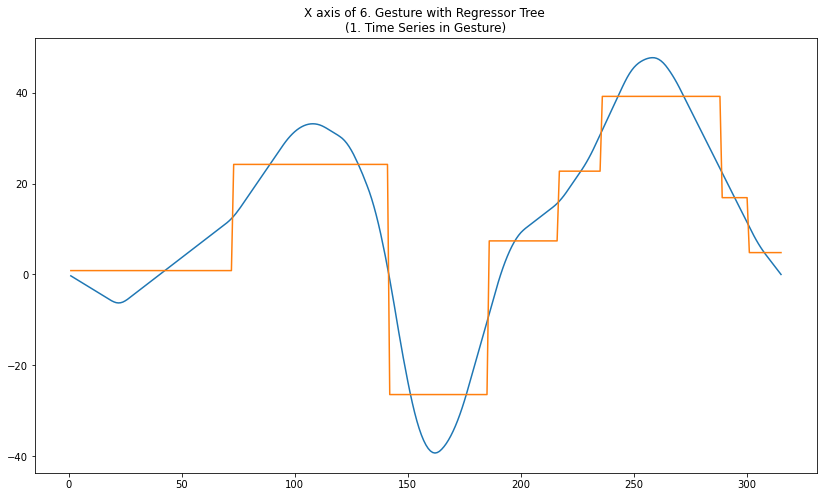

In [158]:
x_6_0_r=visualization_regressor(x_6_r[0], x_6_0_reg_pred, 6, "X", 0)

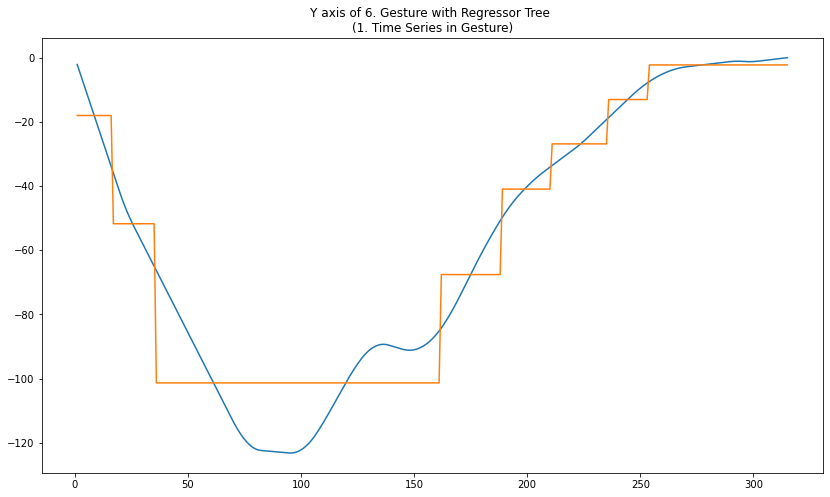

In [159]:
y_6_0_r=visualization_regressor(y_6_r[0], y_6_0_reg_pred, 6, "Y", 0)

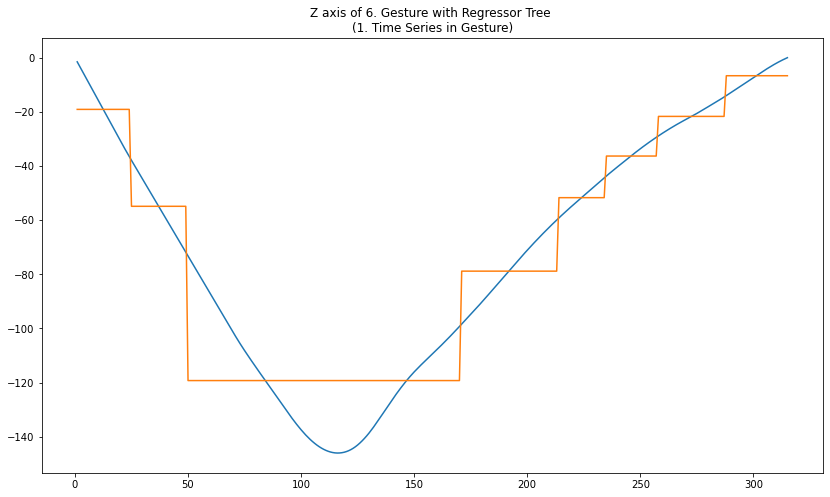

In [160]:
z_6_0_r=visualization_regressor(z_6_r[0], z_6_0_reg_pred, 6, "Z", 0)

# Gesture 7 with Regression Tree

In [161]:
x_7_r=[pd.DataFrame({"time":range(1, len(x_7.T.iloc[:, i])+1), "values":x_7.T.iloc[:, i]}) for i in range(x_7.shape[0])]
y_7_r=[pd.DataFrame({"time":range(1, len(y_7.T.iloc[:, i])+1), "values":y_7.T.iloc[:, i]}) for i in range(y_7.shape[0])]
z_7_r=[pd.DataFrame({"time":range(1, len(z_7.T.iloc[:, i])+1), "values":z_7.T.iloc[:, i]}) for i in range(z_7.shape[0])]

## Individual Decision Models

In [162]:
tree_reg_x_7 = [DecisionTreeRegressor(max_depth=3) for i in range(x_7.shape[0])]
tree_reg_y_7 = [DecisionTreeRegressor(max_depth=3) for i in range(x_7.shape[0])]
tree_reg_z_7 = [DecisionTreeRegressor(max_depth=3) for i in range(x_7.shape[0])]

In [163]:
x_7_0_reg_pred=decision_tree(tree_reg_x_7[0], 0, x_7_r)
y_7_0_reg_pred=decision_tree(tree_reg_y_7[0], 0, y_7_r)
z_7_0_reg_pred=decision_tree(tree_reg_z_7[0], 0, z_7_r)

## PCA for Gesture 7

In [164]:
pca_7 = [pd.DataFrame({"time":x_7_r[i].iloc[:, 0].values,
                         "values_x":x_7_r[i].iloc[:, 1].values,
                         "values_y":y_7_r[i].iloc[:, 1].values,
                         "values_z":z_7_r[i].iloc[:, 1].values,})  for i in range(x_7.shape[0])]

In [165]:
for i in range(len(pca_7)):
    pca=PCA(n_components = 1)
    pca_7[i]["PCA"]=pca.fit_transform(pca_7[i].iloc[:, 1:4])

In [166]:
pca.explained_variance_ratio_

array([0.75109207])

In [167]:
pca.components_.T[:, 0]

array([-0.05074984, -0.67917461, -0.73222012])

## Display of Axis

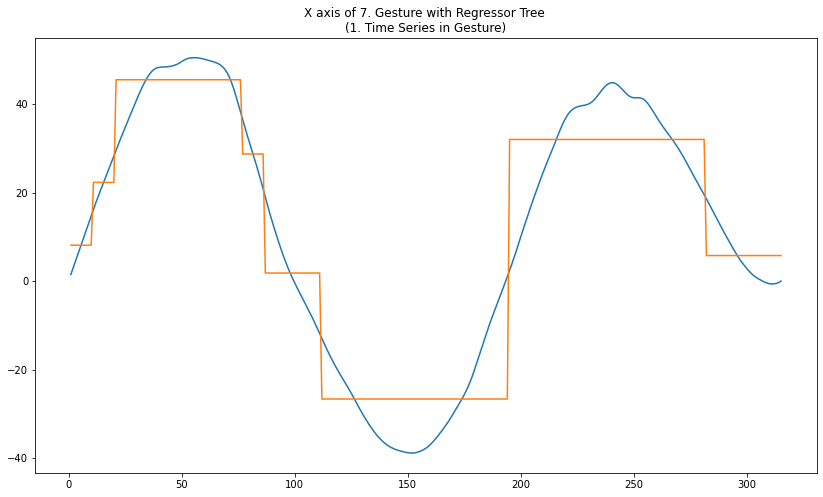

In [168]:
x_7_0_r=visualization_regressor(x_7_r[0], x_7_0_reg_pred, 7, "X", 0)

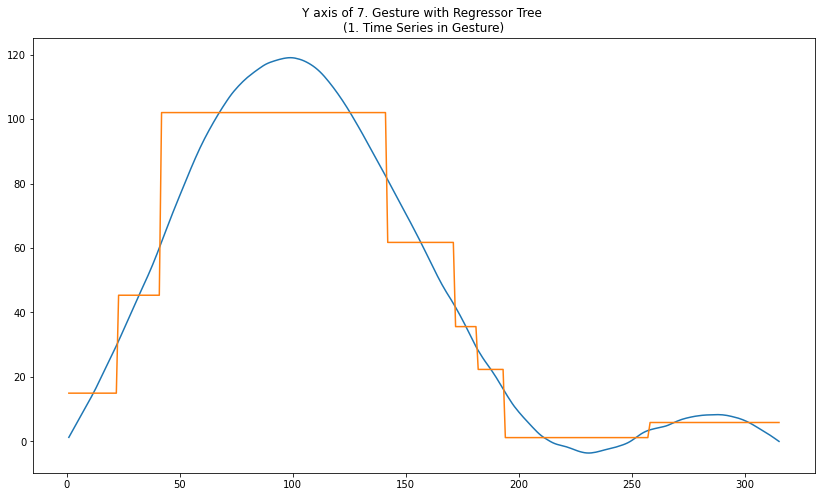

In [169]:
y_7_0_r=visualization_regressor(y_7_r[0], y_7_0_reg_pred, 7, "Y", 0)

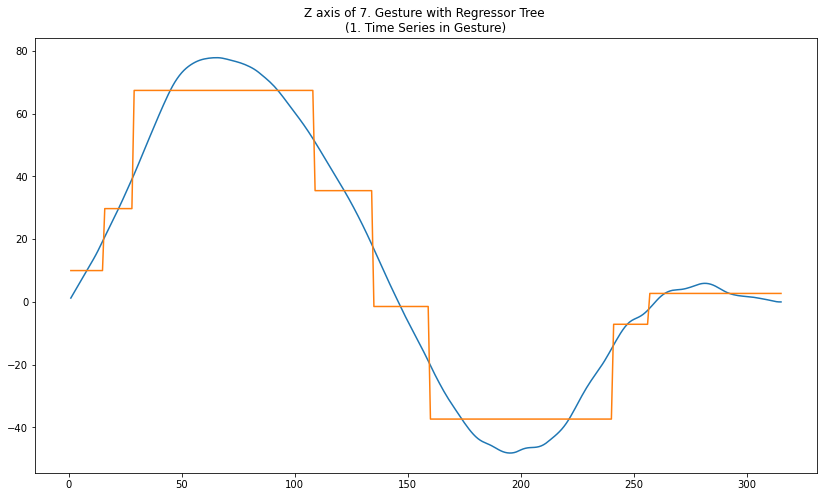

In [170]:
z_7_0_r=visualization_regressor(z_7_r[0], z_7_0_reg_pred, 7, "Z", 0)

# Gesture 8 with Regression Tree

In [171]:
x_8_r=[pd.DataFrame({"time":range(1, len(x_8.T.iloc[:, i])+1), "values":x_8.T.iloc[:, i]}) for i in range(x_8.shape[0])]
y_8_r=[pd.DataFrame({"time":range(1, len(y_8.T.iloc[:, i])+1), "values":y_8.T.iloc[:, i]}) for i in range(y_8.shape[0])]
z_8_r=[pd.DataFrame({"time":range(1, len(z_8.T.iloc[:, i])+1), "values":z_8.T.iloc[:, i]}) for i in range(z_8.shape[0])]

## Individual Decision Models

In [172]:
tree_reg_x_8 = [DecisionTreeRegressor(max_depth=3) for i in range(x_8.shape[0])]
tree_reg_y_8 = [DecisionTreeRegressor(max_depth=3) for i in range(x_8.shape[0])]
tree_reg_z_8 = [DecisionTreeRegressor(max_depth=3) for i in range(x_8.shape[0])]

In [173]:
x_8_0_reg_pred=decision_tree(tree_reg_x_8[0], 0, x_8_r)
y_8_0_reg_pred=decision_tree(tree_reg_y_8[0], 0, y_8_r)
z_8_0_reg_pred=decision_tree(tree_reg_z_8[0], 0, z_8_r)

## PCA for Gesture 8

In [174]:
pca_8 = [pd.DataFrame({"time":x_8_r[i].iloc[:, 0].values,
                         "values_x":x_8_r[i].iloc[:, 1].values,
                         "values_y":y_8_r[i].iloc[:, 1].values,
                         "values_z":z_8_r[i].iloc[:, 1].values,})  for i in range(x_8.shape[0])]

In [175]:
for i in range(len(pca_8)):
    pca=PCA(n_components = 1)
    pca_8[i]["PCA"]=pca.fit_transform(pca_8[i].iloc[:, 1:4])

In [176]:
pca.explained_variance_ratio_

array([0.54634702])

In [177]:
pca.components_.T[:, 0]

array([ 0.87201588,  0.48847628, -0.03129264])

## Display of Axis

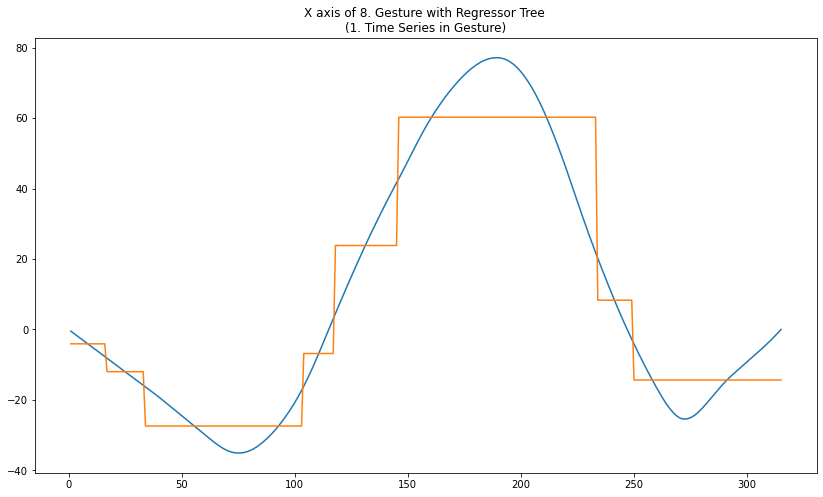

In [178]:
x_8_0_r=visualization_regressor(x_8_r[0], x_8_0_reg_pred, 8, "X", 0)

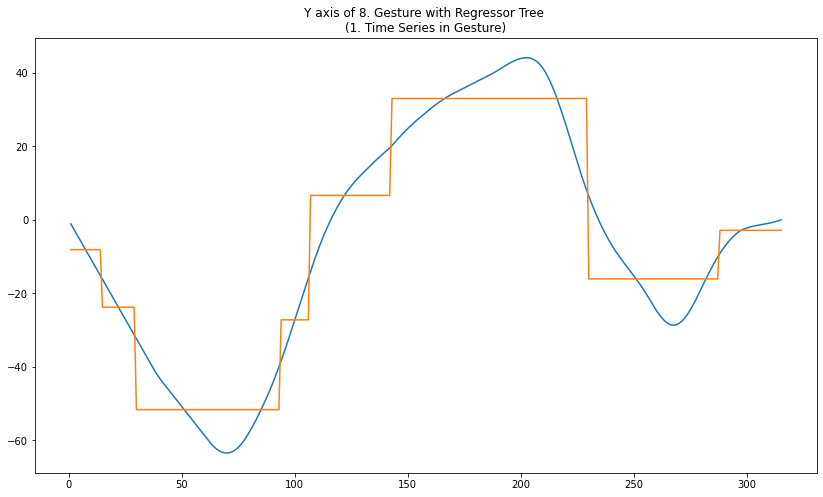

In [179]:
y_8_0_r=visualization_regressor(y_8_r[0], y_8_0_reg_pred, 8, "Y", 0)

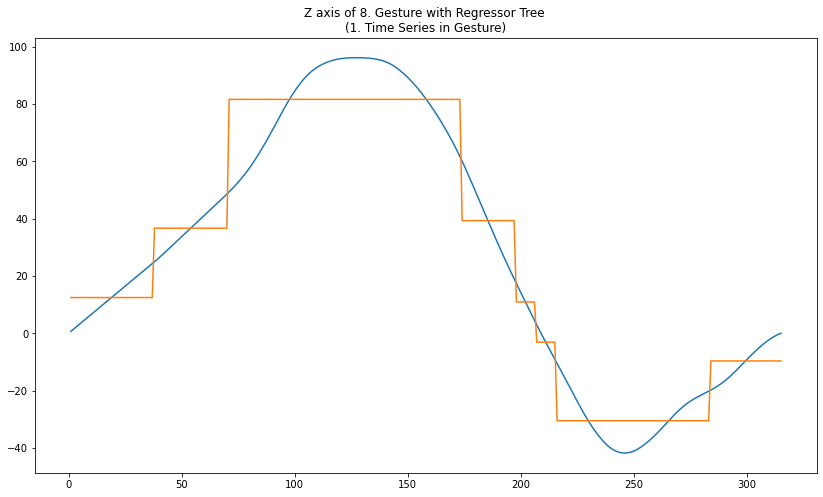

In [180]:
z_8_0_r=visualization_regressor(z_8_r[0], z_8_0_reg_pred, 8, "Z", 0)

In general, Adaptive Piecewise Representation with Linear Regression Tree can get good results in changing phases. However, main problem in the Linear Regressor Tree is that peak positions in axis are represented by a single line. It is caused by greed of the Decision Tree. In these areas, only one line can be located in the middle of the peak but it also results a loss in the representation skill. In general, by increasing the number of dept of Linear Regressor Tree, this problem can be handled. However, in this level Piecewise Aggregate Approximation has better representation to Adaptive Piecewise Representation with Linear Regression Tree.

<a id="5"></a>
# Gesture Recognation Perspective

In [181]:
import seaborn as sns

In [182]:
sns.set(rc={'figure.figsize':(16,16)})

In order to understand performance of the techniques in Gesture Recognition, 2 sample from each gesture will be displayed in the plot. By doing that, differentiation between the Gestures by looking the plot can be undestood. The main problem for these plots are having to many Gestures and Lines in one plot. So, Each technique will be analyzed separately, and 2 different version, 8 Gesture at one plot and 3 Gesture at one plot. In addition, general behavior of obtained lines can be understood much more easily by having 2 separate plot for 2 techniques. 

In addition, for loop and different functions like string_to_value() and scaler_to_1() are used to get similar dataframes in short way. In general, all line plots' y values will be scaled into 0 to 1. For string Representation, manuel values are determined, and MinMaxScaler() is used for getting 0 to 1 values.

As mentioned in the introduction, the main aim in this part to having 1 dimensional representations with different techniques(hard voting and PCA), and understand of their performance with SAX and Linear Regressor Tree. So, we will have 2 different representations with the aiming of estimating/representing the Gesture behavior of given data.

### Regression Tree to Find Piecewise Models on PCA

In [183]:
def decision_tree_pca(dataset):
    model=DecisionTreeRegressor(max_depth=3)
    time=dataset[["time"]]
    values=dataset[["PCA"]]
    model.fit(time, values)
    
    predictions=model.predict(time)
    
    return predictions

In [184]:
pca_names= [pca_1, pca_2, pca_3, pca_4, pca_5, pca_6, pca_7, pca_8]

In [185]:
for pca_data in pca_names:
    for j in range(2):
        pca_data[j]["predictions"]=decision_tree_pca(pca_data[j])

### String to Value

In [186]:
def string_to_value(dataset):
    values=[]
    key_values = {"a": (1/7)*0, "b": (1/7)*1, "c":(1/7)*2, "d": (1/7)*3, "e": (1/7)*4, "f":(1/7)*5, "g": (1/7)*6, "h":(1/7)*7}
    for i in range(len(dataset)):
        values.append(key_values.get(dataset["String"][i]))
    
    return(values)

## DataFrame for String

This part is control the performance of the SAX with hard voting technique.

In [187]:
string_datasets=[string_data_1, string_data_2, string_data_3, string_data_4,
                 string_data_5, string_data_6, string_data_7, string_data_8]

In [188]:
string_gesture=[]
string_id=[]
string_vote=[]
time=[]
gesture_no=1
for dt in string_datasets:    
    for j in range(2):
        sequence=1
        for k in range(len(dt[j])):
            time.append(sequence)
            string_gesture.append(gesture_no)
            string_id.append(j)
            string_vote.append(dt[j]["hard_voting"][k])
            sequence+=1
    gesture_no+=1
    

In [189]:
string_dt=pd.DataFrame({"Gesture No": string_gesture, "ID": string_id, "Time":time, "String": string_vote})

In [190]:
string_dt["string_values"]=string_to_value(string_dt)

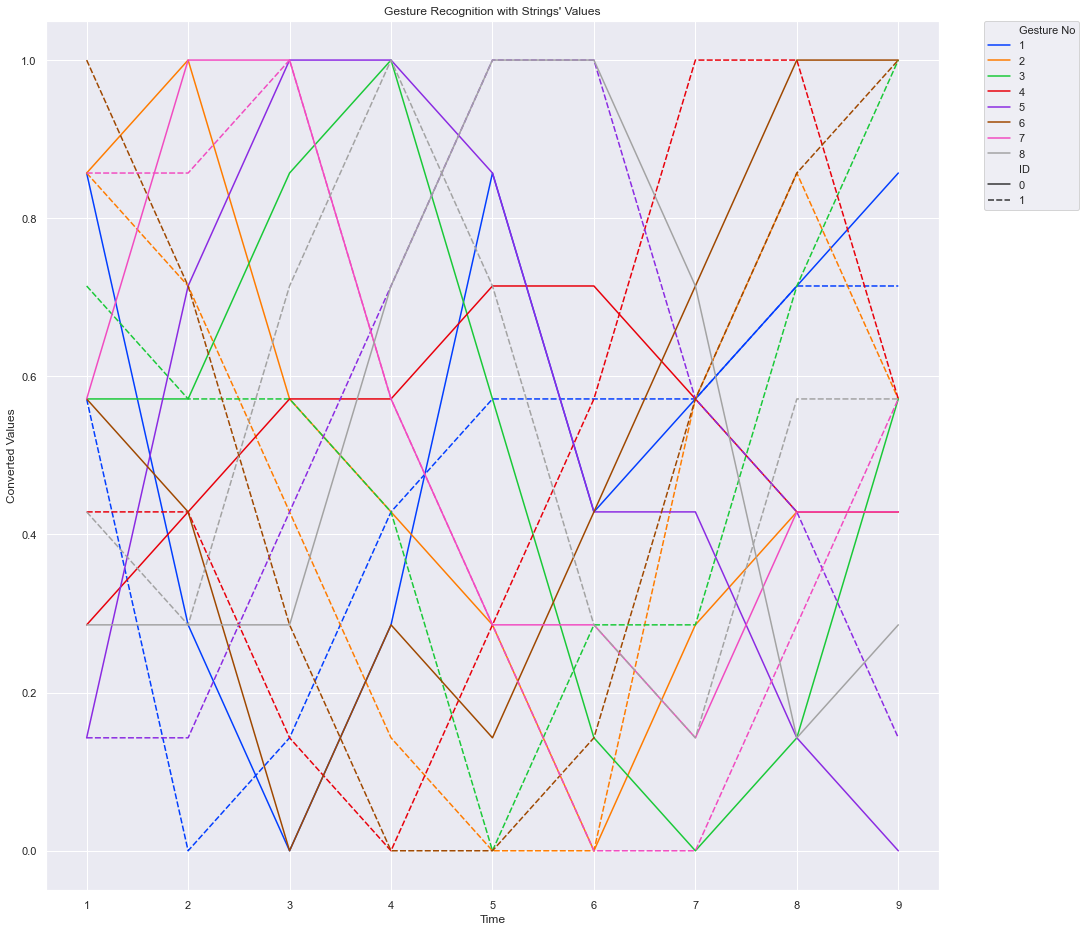

In [191]:
palette = sns.color_palette("bright", 8) 
ax = sns.lineplot(x="Time", y="string_values", style="ID", hue="Gesture No", 
             data=string_dt, palette=palette)
ax.set_title("Gesture Recognition with Strings' Values")
ax.set_ylabel("Converted Values")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Having limited obtion is good for analyzing the possible gesture recognitions visually. Much as there are 16 different lines, it is hard to understand the general behaviour of the gestures. In addition, I have moderate color-blindness, so it can be hard to figure out what is happening in the plot. In this perspective reduced gesture recognition will be tried to understand the performance of SAX with hard voting Technique.

## Reduced Gesture Recognition

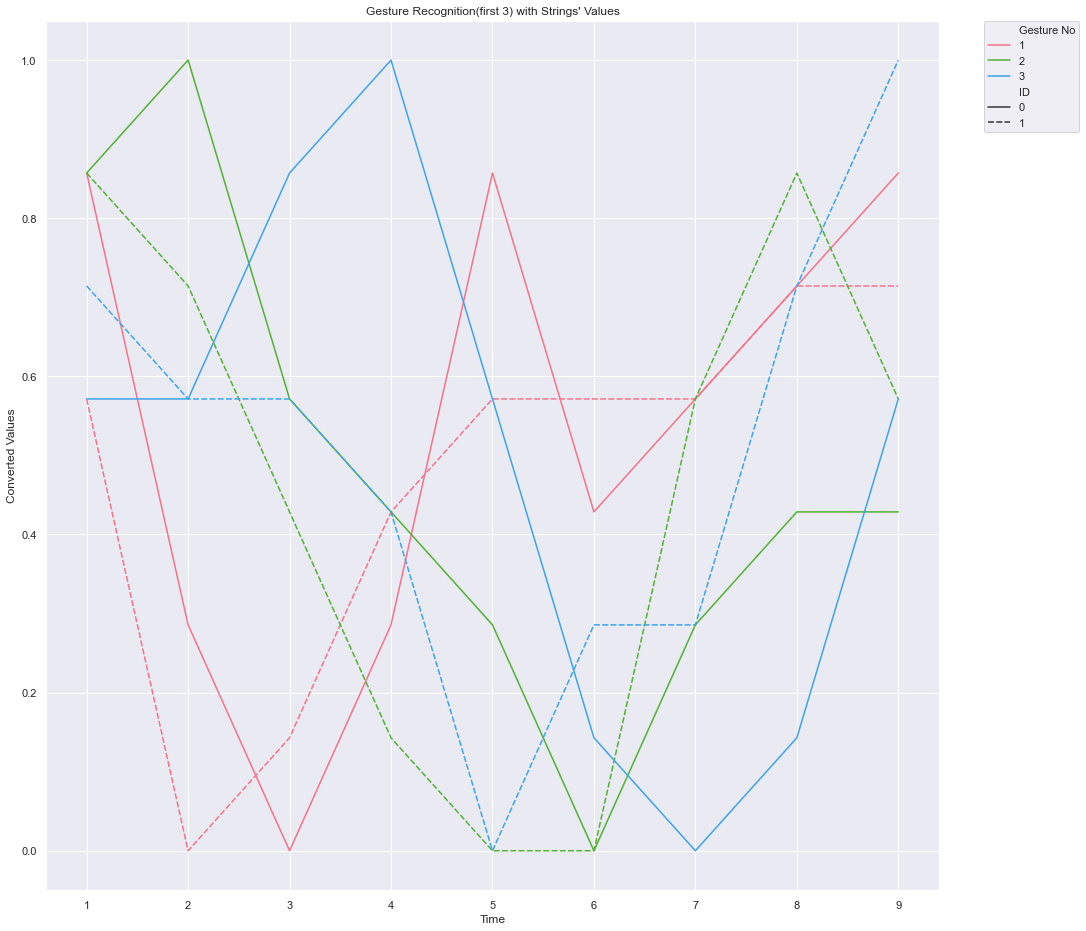

In [202]:
palette_3 = sns.color_palette("husl", 3) 
ax = sns.lineplot(x="Time", y="string_values", style="ID", hue="Gesture No", 
             data=string_dt[string_dt["Gesture No"]<=3], palette=palette_3)
ax.set_title("Gesture Recognition(first 3) with Strings' Values")
ax.set_ylabel("Converted Values")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In this plot, Gesture 1 can be understood easily so it is a good sign related to performance of this apprach. However, this comment cannot be made for gesture 2 and gesture 3. Nevertheless, it can be said that this approach can be a good appraoch in same ways to distinguish the gestures.

# DataFrame for Regressors

This part is control the performance of the Linear Regressor Tree with PCA technique.

In [193]:
from sklearn.preprocessing import MinMaxScaler

In [194]:
scaler=MinMaxScaler()

## Value Normalization

In order to have similar scale with previous technique. In addition, scale was applied each instance separately.

In [195]:
def scaler_to_1(dataset):   
    scaled=[]
    
    for i in range(8):
        current_dt=dataset[dataset["Gesture No"]==i+1]       
        for j in range(2):
            last_dt=current_dt[current_dt["ID"]==j]
            current_list=scaler.fit_transform(last_dt[["PCA Values"]]).reshape(-1)
            for k in range(len(current_list)):
                scaled.append(current_list[k])
    return(scaled)

## DataFrame for String

In [196]:
pca_datasets=[pca_1, pca_2, pca_3, pca_4,
                 pca_5, pca_6, pca_7, pca_8]

In [197]:
pca_gesture=[]
pca_id=[]
pca_value=[]
time=[]
gesture_no=1
for dt in pca_datasets:    
    for j in range(2):
        sequence=1
        for k in range(len(dt[j])):
            time.append(sequence)
            pca_gesture.append(gesture_no)
            pca_id.append(j)
            pca_value.append(dt[j]["predictions"][k])
            sequence+=1
    gesture_no+=1
    

In [198]:
pca_dt=pd.DataFrame({"Gesture No": pca_gesture, "ID": pca_id, "Time":time, "PCA Values": pca_value})

In [199]:
pca_dt["Scaled Values"]=scaler_to_1(pca_dt)

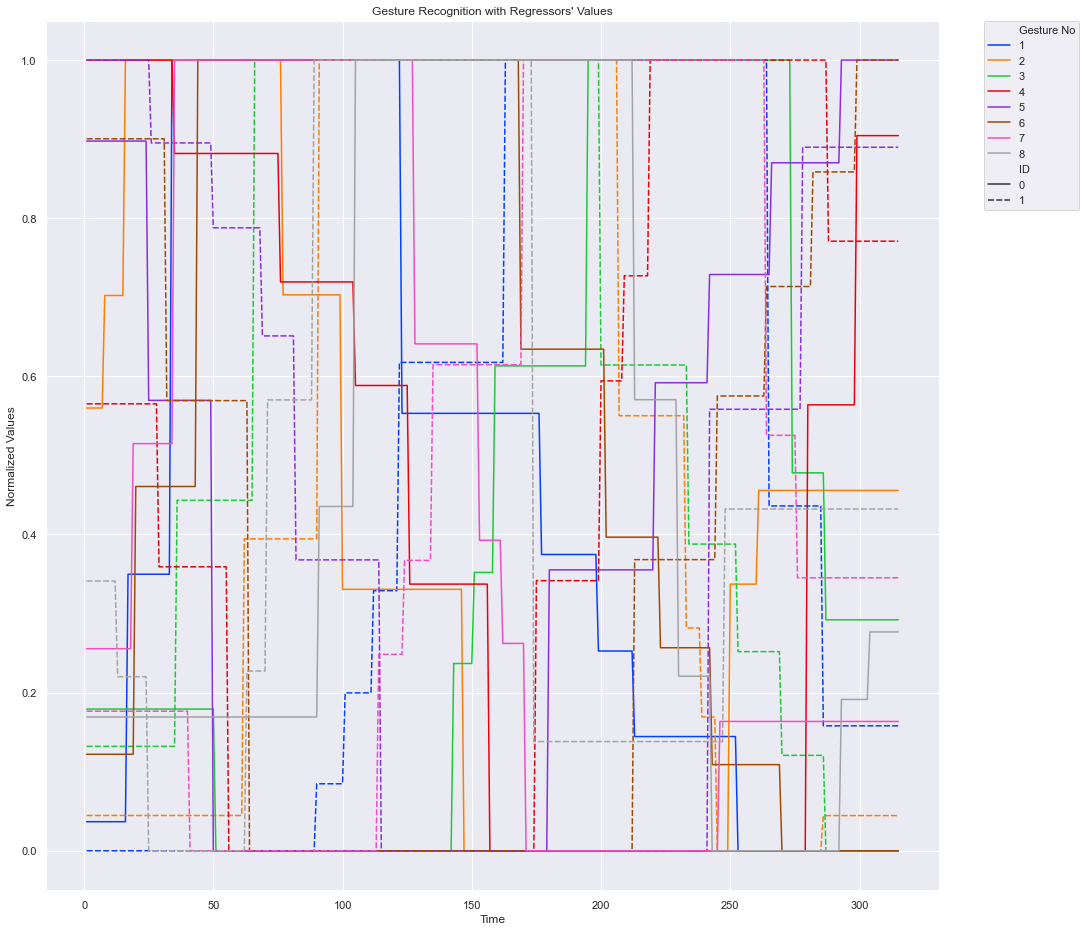

In [200]:
ax = sns.lineplot(x="Time", y="Scaled Values", style="ID", hue="Gesture No", 
             data=pca_dt, palette=palette)
ax.set_title("Gesture Recognition with Regressors' Values")
ax.set_ylabel("Normalized Values")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Again there are 16 different lines and it is hard to understand the general behaviour of the gestures. I want to emphasize one more time, I have moderate color-blindness, so it can be hard to figure out what is happening in the plot. In this perspective reduced gesture recognition will be tried to understand the performance of Adaptive Piecewise Representation with Linear Regressor Tree with PCA.

## Reduced Gesture Recognition

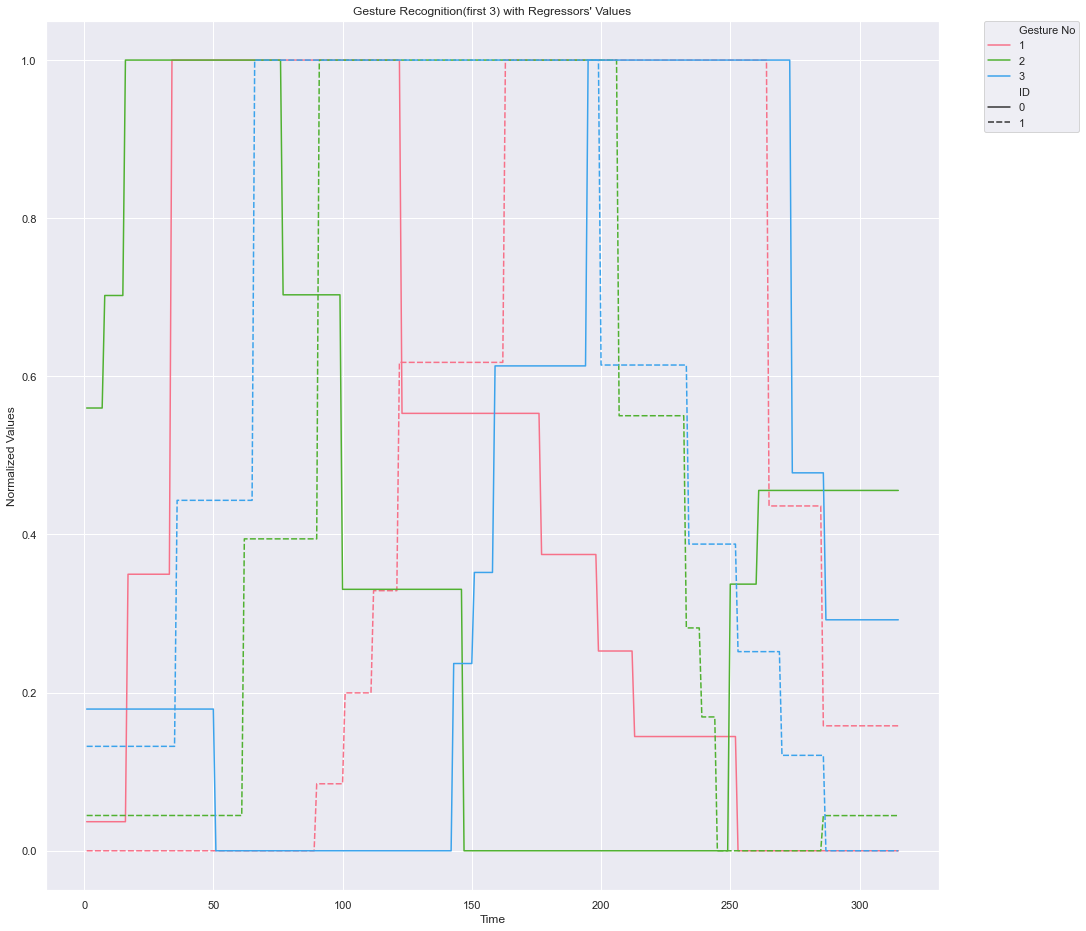

In [203]:
ax = sns.lineplot(x="Time", y="Scaled Values", style="ID", hue="Gesture No", 
             data=pca_dt[pca_dt["Gesture No"]<=3], palette=palette_3)
ax.set_title("Gesture Recognition(first 3) with Regressors' Values")
ax.set_ylabel("Normalized Values")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Much as there is more alternative value for y axis, there is less rapid change compared to the other. One of the reason for this situation can be caused from having 315 time point in x axis. However, gesture recognition by lookin the plot is harder than previous one. One of the reason for this situation can be PCA coefficient finding for each instance seperately. The main objective for trying pca for each instances is to have a system can be applied to new instances without knowing the gesture type. In general, some part of the lines gives hints related to gesture but it is hard to conclude any decision related to gesture by just looking these things.

<a id="6"></a>
# Last Comment and Conclusion

In this homework, preprocessing for gesture display was tried in the first part and different approaches were tried to represent the gestures. For second part, inspections were hold in the axis bases, which give some insights related to approaches and their deficients. Moreover, gesture based problems could be analyzed by having these inspections, but there was no certain problem related to gesture-based things. 

At the end of the notebook, 2 different approach with 2 different techniques(details can be found in description) were tried, which was demanded by homework description. These techniques were analyzed by taking 2 samples from each gesture. At the end, 4 different plots were created and general performance of approaches were interpreted. It is hard to pick a certain winner among these 2 approach but it can be said that SAX with hard voting technique is better in somehow to recognition of the gestures. The main reason for this selection is is has similar conversion in each step, so this technique can continue the information related to gesture. Because of this fact, **I would choose the first approach, namely SAX with moderate hard voting technique.**

One of the problem for this selection is the my disability related to colors. So, I tried my best to understand their behaviour but it may not be adequate to decide which approach is the best. I wanted to mention this situation for the evaluation part of my homework's comments.